# Papers

Trovare papers che trovano:<br>

1. Correlazione tra:<br>
     engagemente e recall/like <br>  
     alpha e recall/like<br>  
     beta e racall/like<br>   
     gamma e recall/like<br>
     tetha e recall/like (effort index)<br>   

2. Stessa cosa con ogni feature che viene rilevante.





# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install openpyxl

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import os

# Percorso alla cartella desiderata
# Cambia la directory alla cartella desiderata
os.chdir('/content/drive/My Drive/Thesis/ANALISI_TESI')  # Modifica il percorso con il nome corretto


# Conferma che la directory è stata impostata
print("Directory corrente:", os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Directory corrente: /content/drive/.shortcut-targets-by-id/1HL6A6j5Pa-pX7NaJjXlcoTsKKaU_jPJ0/Thesis/ANALISI_TESI


In [4]:
df=pd.read_csv('merged_feat_bio.csv')
# classific=pd.read_excel('Classifica_Aziende_Ordinata.xlsx')
# df=df.merge(classific, on='Content', how='left')

In [5]:
df=df[~((df['ID']=='s264')&(df['Device']=='TV'))]
df

,ID,Content,Mean PSD Ch1 Delta (dB),Mean PSD Ch1 Theta (dB),Mean PSD Ch1 Alpha (dB),Mean PSD Ch1 Beta (dB),Mean PSD Ch1 Gamma (dB),Mean PSD Ch2 Delta (dB),Mean PSD Ch2 Theta (dB),Mean PSD Ch2 Alpha (dB),...,volume_dbfs,diff_percent,GSR.Resistance.CAL,GSR.Conductance.CAL,Start (ms)_y,GSR_standardized_all,Age,Age Group,FAA_sign,Pleasantness_sign
0,s10,CHANEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-35.115642,24.305064,886.002671,1.128673,536445.3125,-0.860123,50,35-54,-1,-1
1,s10,CHANEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-36.558419,-4.108647,885.958093,1.128722,537445.3125,-0.859996,50,35-54,-1,-1
2,s10,CHANEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-35.010539,4.233992,885.958093,1.128722,537445.3125,-0.859996,50,35-54,-1,-1
3,s10,CHANEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-32.983252,5.790505,884.740534,1.130276,538445.3125,-0.855911,50,35-54,-1,-1
4,s10,CHANEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-31.730845,3.797100,884.740534,1.130276,538445.3125,-0.855911,50,35-54,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51781,s99,LETE,NaN,5.356733,1.269112,0.558470,0.117842,30.995597,6.762387,0.864570,...,-29.270520,-0.837798,989.478003,1.010635,461445.3125,-0.747352,30,18-34,1,1
51782,s99,LETE,114.762500,NaN,NaN,0.616879,0.148730,42.648131,2.445119,2.079218,...,-28.219256,3.591545,989.478003,1.010635,461445.3125,-0.747352,30,18-34,-1,-1
51783,s99,LETE,120.614633,9.132717,2.296677,0.758752,0.226569,16.221836,6.881768,0.667268,...,-34.862565,-23.541755,992.308112,1.007752,462445.3125,-0.754618,30,18-34,1,-1
51784,s99,LETE,27.052039,NaN,2.017437,1.068317,0.058614,4.802861,4.429962,0.476870,...,-71.224149,-104.299797,992.308112,1.007752,462445.3125,-0.754618,30,18-34,-1,-1


# Drop Columns

In [6]:
# Eliminare colonne specifiche dal DataFrame
columns_to_drop = [ 'file','frame_index',
    'Engagement', 'Attention', 'Pleasantness',
    'Mean PSD Ch1 Delta (dB)', 'Mean PSD Ch1 Theta (dB)', 'Mean PSD Ch1 Alpha (dB)',
    'Mean PSD Ch1 Beta (dB)', 'Mean PSD Ch1 Gamma (dB)', 'Mean PSD Ch2 Delta (dB)',
    'Mean PSD Ch2 Theta (dB)', 'Mean PSD Ch2 Alpha (dB)', 'Mean PSD Ch2 Beta (dB)',
    'Mean PSD Ch2 Gamma (dB)', 'Mean PSD Ch3 Delta (dB)', 'Mean PSD Ch3 Theta (dB)',
    'Mean PSD Ch3 Alpha (dB)', 'Mean PSD Ch3 Beta (dB)', 'Mean PSD Ch3 Gamma (dB)',
    'Mean PSD Ch4 Delta (dB)', 'Mean PSD Ch4 Theta (dB)', 'Mean PSD Ch4 Alpha (dB)',
    'Mean PSD Ch4 Beta (dB)', 'Mean PSD Ch4 Gamma (dB)', 'Mean PSD Ch5 Delta (dB)',
    'Mean PSD Ch5 Theta (dB)', 'Mean PSD Ch5 Alpha (dB)', 'Mean PSD Ch5 Beta (dB)',
    'Mean PSD Ch5 Gamma (dB)', 'Mean PSD Ch6 Delta (dB)', 'Mean PSD Ch6 Theta (dB)',
    'Mean PSD Ch6 Alpha (dB)', 'Mean PSD Ch6 Beta (dB)', 'Mean PSD Ch6 Gamma (dB)',
    'Mean PSD Ch7 Delta (dB)', 'Mean PSD Ch7 Theta (dB)', 'Mean PSD Ch7 Alpha (dB)',
    'Mean PSD Ch7 Beta (dB)', 'Mean PSD Ch7 Gamma (dB)',
    'Mean PSD Electrode Cluster Average Delta (dB)',
    'Mean PSD Electrode Cluster Average Theta (dB)', 'Mean PSD Electrode Cluster Average Alpha (dB)',
    'Mean PSD Electrode Cluster Average Gamma (dB)',   'Mean PSD Electrode Cluster Average Beta (dB)',
    'Mean Frontal Asymmetry Delta', 'Mean Frontal Asymmetry Theta', 'Mean Frontal Asymmetry Alpha',
    'Mean Frontal Asymmetry Beta', 'Mean Frontal Asymmetry Gamma',
    'Type','Engagement(1/alpha)', 'FAA', 'Pleasantness Index', 'AW Index',
    'Vamv Valence', 'Kirk Valence', 'Ram12 Valence', 'Ram15 Valence',
    'Choice Index (Gamma)', 'Choice Index (Beta)', 'Effort Index 1',
    'Effort Index 2',

]
df_cleaned = df.drop(columns=columns_to_drop)

In [7]:
df_cleaned.columns[:200]

Index(['ID', 'Content', 'Device', 'Protocol', 'Vision', 'Position',
       'Workload_mean', 'Workload_mean2', 'SASI', 'Engagement standardized',
       'Pleasantness standardized', 'Attention standardized',
       'FAA standardized', 'Engagement(1/alpha) standardized',
       'Beta standardized', 'Alpha standardized', 'Gamma standardized',
       'Delta standardized', 'AW Index standardized',
       'Vamv Valence standardized', 'Kirk Valence standardized',
       'Ram12 Valence standardized', 'Ram15 Valence standardized',
       'Choice Index (Gamma) standardized', 'Choice Index (Beta) standardized',
       'Effort Index 1 standardized', 'Effort Index 2 standardized',
       'Workload_mean standardized', 'Workload_mean2 standardized',
       'SASI standardized', 'Gender', 'Unaided Recall', 'Aided Recall',
       'Content Appreciation', 'Frame_Num', 'Duration AD', 'VOLTI',
       'TONALITÀ DOMINANTE CALDA', 'BRAND', 'PERSON SHOWN',
       'CELEBRITY PRESENT', 'CHILDREN', 'GROUP OF PEOPL

# Feature Engineering

## BRAND features


In [8]:
#BRAND features
df_cleaned['BRAND_X_ENGAGEMENT'] = df_cleaned['BRAND'] * df_cleaned['Engagement standardized']
df_cleaned['BRAND_X_ATTENTION'] = df_cleaned['BRAND'] * df_cleaned['Attention standardized']
df_cleaned['BRAND_X_PLEASANTNESS'] = df_cleaned['BRAND'] * df_cleaned['Pleasantness standardized']
df_cleaned['BRAND_X_GSR'] = df_cleaned['BRAND'] * df_cleaned['GSR_standardized_all']
df_cleaned['BRAND_X_FAA'] = df_cleaned['BRAND'] * df_cleaned['FAA_sign']
df_cleaned['BRAND_X_PLEASANTNESS_SIGN'] = df_cleaned['BRAND'] * df_cleaned['Pleasantness_sign']
df_cleaned['BRAND_X_ENGAGEMENT(1/alpha)'] = df_cleaned['BRAND'] * df_cleaned['Engagement(1/alpha) standardized']
df_cleaned['BRAND_X_WORKLOAD'] = df_cleaned['BRAND'] * df_cleaned['Workload_mean standardized']
##################################################################################
df_cleaned['BRAND_X_BETA_MEAN'] = df_cleaned['BRAND'] * df_cleaned['Beta standardized']
df_cleaned['BRAND_X_ALPHA_MEAN'] = df_cleaned['BRAND'] * df_cleaned['Alpha standardized']
df_cleaned['BRAND_X_DELTA_MEAN'] = df_cleaned['BRAND'] * df_cleaned['Delta standardized']
df_cleaned['BRAND_X_GAMMA_MEAN'] = df_cleaned['BRAND'] * df_cleaned['Gamma standardized']
##################################################################################
df_cleaned['BRAND_X_CONTRAST'] = df_cleaned['BRAND'] * df_cleaned['contrast']
df_cleaned['BRAND_X_MOTION_VIDEO'] = df_cleaned['BRAND'] * df_cleaned['motion_video']
df_cleaned['BRAND_X_LUMINANCE'] = df_cleaned['BRAND'] * df_cleaned['luminance']
df_cleaned['BRAND_X_HUE'] = df_cleaned['BRAND'] * df_cleaned['hue']
df_cleaned['BRAND_X_SATURATION'] = df_cleaned['BRAND'] * df_cleaned['saturation']
df_cleaned['BRAND_X_FEATURE_COMPLEXITY'] = df_cleaned['BRAND'] * df_cleaned['feature_complexity']
df_cleaned['BRAND_X_DIFF_PERCENT'] = df_cleaned['BRAND'] * df_cleaned['diff_percent']
df_cleaned['BRAND_X_VOLUME_VAR'] = df_cleaned['BRAND'] * df_cleaned['volume_dbfs']
###################################################################################
df_cleaned['BRAND_X_CELEBRITY_BETA'] = df_cleaned['BRAND'] * df_cleaned['CELEBRITY PRESENT'] * df_cleaned['Beta standardized']


# Interaction between FAA, Pleasantness and GSR
df_cleaned['Pleasantness_sign_GSR_standardized'] = df_cleaned['Pleasantness_sign'] * df_cleaned['GSR_standardized_all']
df_cleaned['FAA_sign_GSR_standardized'] = df_cleaned['GSR_standardized_all'] * df_cleaned['FAA_sign']

## Standardize Numerical clummns left

In [9]:
from sklearn.preprocessing import StandardScaler

# List of columns to standardize
columns_to_standardize = [
    'BRAND', 'luminance', 'dominant_color', 'saturation', 'hue', 'contrast',
    'num_edges', 'symmetry', 'feature_complexity', 'entropy', 'colorfulness',
    'hog_features', 'texture_contrast', 'motion_per_frame', 'motion_video',
    'volume_dbfs', 'diff_percent', 'Age','mean_loudness',
       'std_loudness', 'onset_density', 'mean_timbre_centroid',
       'std_timbre_centroid'
]
# Filter the list of columns to standardize
columns_to_standardize = [
    col for col in columns_to_standardize
    if pd.api.types.is_numeric_dtype(df_cleaned[col])  # Check if the column is numeric
    and not df_cleaned[col].dropna().isin([0, 1]).all()  # Exclude columns with only 0 and 1 values
]

# Initialize the scaler
scaler = StandardScaler()

# Standardize the selected columns
df_cleaned[columns_to_standardize] = scaler.fit_transform(df_cleaned[columns_to_standardize])

In [10]:
df_cleaned = df_cleaned[df_cleaned['Vision'] == 1].copy() #take only vision 1

# Aggregate groups

In [11]:
import pandas as pd

# Perform the aggregation
df_aggregated = df_cleaned.groupby(['ID', 'Content']).agg({
    'Device': 'first',
    'Protocol': 'first',
    'Engagement standardized': 'mean',
    'Engagement(1/alpha) standardized': 'mean',
    'Pleasantness standardized': 'mean',
    'Attention standardized': 'mean',
    'FAA standardized': 'mean',
    'Gender': 'first',
    'Unaided Recall': 'max',
    'Aided Recall': 'max',
    'BRAND': 'mean',
    'luminance': ['mean', 'std'],
    'saturation': ['mean', 'std'],
    'hue': ['mean', 'std'],
    'contrast': ['mean', 'std'],
    'feature_complexity': ['mean', 'std'],
    'entropy': 'mean',
    'texture_contrast': 'mean',
    'motion_per_frame': ['mean', 'std'],
    'motion_video': 'mean',
    'volume_dbfs': ['mean', 'std'],
    'diff_percent': ['mean', 'std'],
    'Age': 'first',
    'GSR_standardized_all': 'mean',
    'FAA_sign_GSR_standardized': 'mean',
    'Pleasantness_sign_GSR_standardized': 'mean',
    'FAA_sign': 'mean',
    'Pleasantness_sign': 'mean',
    'Mean ISC': 'mean',
    'Alpha_ISC': 'mean',
    'Beta_ISC': 'mean',
    'Gamma_ISC': 'mean',
    'Theta_ISC': 'mean',
    'Delta_ISC': 'mean',
    'Position': 'first',
    'First_Brand': 'first',
    'BRAND_X_ENGAGEMENT': 'mean',
    'BRAND_X_ATTENTION': 'mean',
    'BRAND_X_PLEASANTNESS': 'mean',
    'BRAND_X_GSR': 'mean',
    'BRAND_X_FAA': 'mean',
    'BRAND_X_ENGAGEMENT(1/alpha)': 'mean',
    'BRAND_X_WORKLOAD': 'mean',
    'Duration AD': 'first',
    'Beta standardized': 'mean',
    'Gamma standardized': 'mean',
    'Alpha standardized': 'mean',
    'Delta standardized': 'mean',
    'BRAND_X_BETA_MEAN': 'mean',
    'BRAND_X_ALPHA_MEAN': 'mean',
    'BRAND_X_DELTA_MEAN': 'mean',
    'BRAND_X_GAMMA_MEAN': 'mean',
    'BRAND_X_VOLUME_VAR': 'mean',
    'BRAND_X_CONTRAST': 'mean',
    'BRAND_X_MOTION_VIDEO': 'mean',
    'BRAND_X_LUMINANCE': 'mean',
    'BRAND_X_HUE': 'mean',
    'BRAND_X_SATURATION': 'mean',
    'BRAND_X_FEATURE_COMPLEXITY': 'mean',
    'BRAND_X_DIFF_PERCENT': 'mean',
    'BRAND_X_CELEBRITY_BETA': 'mean',
    'AW Index standardized': 'mean',
    'Vamv Valence standardized': 'mean',
    'Kirk Valence standardized': 'mean',
    'Ram12 Valence standardized': 'mean',
    'Ram15 Valence standardized': 'mean',
    'Choice Index (Gamma) standardized': 'mean',
    'Choice Index (Beta) standardized': 'mean',
    'Effort Index 1 standardized': 'mean',
    'Effort Index 2 standardized': 'mean',
    'Workload_mean standardized': 'mean',
    'Workload_mean2 standardized': 'mean',
    'SASI standardized': 'mean',
    'mean_loudness': 'mean',
    'std_loudness': 'mean',
    'onset_density': 'mean',
    'mean_timbre_centroid': 'mean',
    'std_timbre_centroid': 'mean',
}).reset_index()

# Flatten column names and append "_std" for standard deviation
df_aggregated.columns = [
    f"{col[0]}_std" if isinstance(col, tuple) and col[1] == 'std' else col[0]
    for col in df_aggregated.columns
]


df_aggregated

,ID,Content,Device,Protocol,Engagement standardized,Engagement(1/alpha) standardized,Pleasantness standardized,Attention standardized,FAA standardized,Gender,...,Effort Index 1 standardized,Effort Index 2 standardized,Workload_mean standardized,Workload_mean2 standardized,SASI standardized,mean_loudness,std_loudness,onset_density,mean_timbre_centroid,std_timbre_centroid
0,s10,CHANEL,Laptop,Linear_180,0.097738,0.231190,-0.347149,-0.072406,-0.165808,Femmina,...,-0.286151,-0.508246,0.308279,0.356595,-0.001720,-0.044979,-0.085085,-0.406201,-0.564363,-0.301309
1,s10,COOP,Laptop,Linear_180,0.304939,0.285846,-0.102116,-0.317941,0.148952,Femmina,...,0.037769,0.133772,0.331186,0.265748,0.264403,0.036699,-0.030848,0.425042,0.366547,0.284523
2,s100,BARILLA,TV,Linear_180,0.269590,-0.373616,0.016261,0.298118,-0.000934,Femmina,...,-0.063467,-0.588699,0.424863,0.589786,-0.054880,-0.022003,0.099122,-0.054521,-0.415863,-0.283774
3,s1000,MUTTI,TV,VOD,0.332985,-0.355383,-0.001304,0.250813,0.012039,Femmina,...,0.033394,-0.131466,0.267088,0.177815,0.141599,-0.150320,0.204062,0.578914,-0.175047,0.569767
4,s1005,ORASI,Smartphone,VOD,1.109985,0.263675,-0.268078,-0.469095,-0.530490,Femmina,...,-0.665734,-0.687502,0.044424,0.203944,1.175490,-0.054595,0.145351,0.171295,1.048185,0.562242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,s95,LETE,Laptop,Linear_180,-0.161765,0.002973,0.085766,0.030107,0.017442,Maschio,...,0.094067,0.602643,-0.149159,-0.118714,-0.147315,0.155971,0.041496,-0.581424,1.263997,0.398932
591,s95,MUTTI,Laptop,Linear_180,0.130799,-0.217707,0.148617,0.094545,0.219528,Maschio,...,0.185432,0.440691,-0.057131,0.053772,0.116090,-0.150320,0.204062,0.578914,-0.175047,0.569767
592,s97,MULTICENTRUM,Laptop,Linear_60,0.411928,0.032550,-0.301052,-0.069442,-0.015071,Femmina,...,0.051167,0.033747,0.169457,0.272541,0.376017,-0.044492,0.165964,0.121114,-0.018630,0.401380
593,s99,CHANEL,Laptop,Linear_180,0.192713,-0.080993,0.024585,-0.040719,0.030599,Femmina,...,-0.183495,-0.251927,0.024501,0.110385,0.182639,-0.044979,-0.085085,-0.406201,-0.564363,-0.301309


In [12]:
df_aggregated.columns

Index(['ID', 'Content', 'Device', 'Protocol', 'Engagement standardized',
       'Engagement(1/alpha) standardized', 'Pleasantness standardized',
       'Attention standardized', 'FAA standardized', 'Gender',
       'Unaided Recall', 'Aided Recall', 'BRAND', 'luminance', 'luminance_std',
       'saturation', 'saturation_std', 'hue', 'hue_std', 'contrast',
       'contrast_std', 'feature_complexity', 'feature_complexity_std',
       'entropy', 'texture_contrast', 'motion_per_frame',
       'motion_per_frame_std', 'motion_video', 'volume_dbfs',
       'volume_dbfs_std', 'diff_percent', 'diff_percent_std', 'Age',
       'GSR_standardized_all', 'FAA_sign_GSR_standardized',
       'Pleasantness_sign_GSR_standardized', 'FAA_sign', 'Pleasantness_sign',
       'Mean ISC', 'Alpha_ISC', 'Beta_ISC', 'Gamma_ISC', 'Theta_ISC',
       'Delta_ISC', 'Position', 'First_Brand', 'BRAND_X_ENGAGEMENT',
       'BRAND_X_ATTENTION', 'BRAND_X_PLEASANTNESS', 'BRAND_X_GSR',
       'BRAND_X_FAA', 'BRAND_X_ENGAGEME

In [13]:
#rimuoviamo l'unoco partecipante che ha inserito 'Altro' in Gender, in quanto da solo non può adeguatamente rappresentare la sua categoria
df_aggregated=df_aggregated[~(df_aggregated['Gender']=='Altro/Preferisco non rispondere')]
df_aggregated.to_csv('df_aggregated.csv', index=False)

In [14]:
df_aggregated_R = df_aggregated.copy()
df_aggregated_R.columns = df_aggregated.columns.str.replace(' ', '_')
df_aggregated_R.to_csv('df_aggregated_R.csv', index=False)

In [15]:
#take oly columns we need fo our analysis
reg_eng = df_aggregated.drop(columns=['ID', 'Protocol','Aided Recall','motion_per_frame'])

In [16]:
#Create the dummy Gender_Femina
reg_eng['Gender_Femmina'] = reg_eng['Gender'].apply(lambda x: 1 if x == 'Femmina' else 0)


#Dummy for Device
reg_eng = pd.get_dummies(reg_eng, columns=['Device'], prefix='Device', drop_first=True)
reg_eng[['Device_TV', 'Device_Smartphone']] = reg_eng[['Device_TV', 'Device_Smartphone']].astype('int')




# ML Time series analysis

## CNN + LSTM

### BIOMETRICHE


In [17]:
# Install necessary library
!pip install scikeras

Shape di X dopo padding: (595, 61, 13)
Shape di y: (595,)
Shape di X_train dopo SMOTE: (544, 61, 13)
Distribuzione delle classi dopo SMOTE: (array([0, 1]), array([272, 272]))
Fold 1/5
Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.4850 - loss: 15.0583 - val_accuracy: 0.6387 - val_loss: 13.7470 - learning_rate: 0.0010
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5965 - loss: 13.5318 - val_accuracy: 0.6134 - val_loss: 12.4069 - learning_rate: 0.0010
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5757 - loss: 12.2443 - val_accuracy: 0.6134 - val_loss: 11.1659 - learning_rate: 0.0010
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5578 - loss: 11.0312 - val_accuracy: 0.5042 - val_loss: 10.0810 - learning_rate: 0.0010
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5773 - loss: 9.8980 - val_accuracy: 0.4454 - val_loss: 9.1380 - learning_rate: 0.0010
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step 

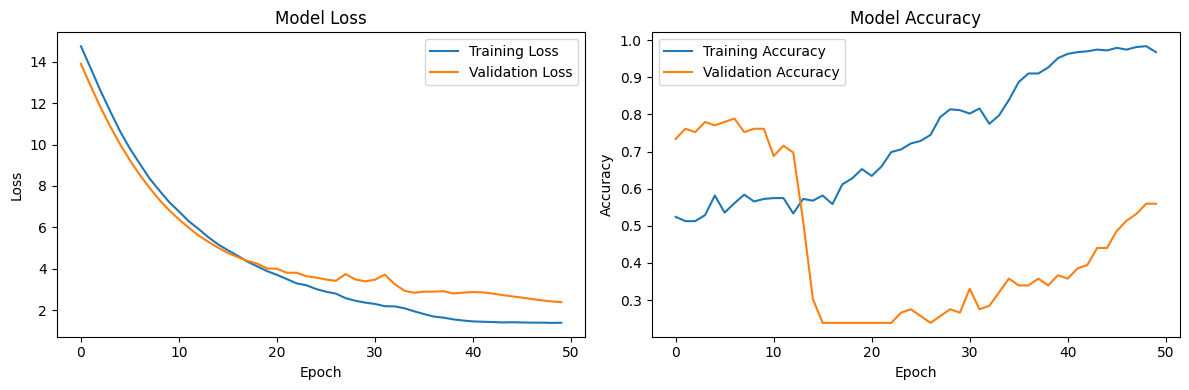

In [18]:

import numpy as np
import tensorflow as tf
import random
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input,
    Conv1D,
    MaxPooling1D,
    BatchNormalization,
    LSTM,
    Bidirectional,
    Dense,
    Dropout,
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from scikeras.wrappers import KerasClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold


# Filtra e seleziona le colonne rilevanti dal DataFrame
df_cleaned2 = df_cleaned[[
    'ID',
    'Content',
    'Pleasantness standardized',
    'Attention standardized',
    'Engagement standardized',
    'GSR_standardized_all',
    'Alpha_ISC',
    'Beta_ISC',
    'Gamma_ISC',
    'Theta_ISC',
    'Delta_ISC',
    'Beta standardized',
    'Gamma standardized',
    'Alpha standardized',
    'Delta standardized',

    'Unaided Recall',

]]

# Raggruppa per ID e Content
grouped = df_cleaned2.groupby(['ID', 'Content'])

sequence_data = []
sequence_labels = []

# Itera sui gruppi per creare le sequenze
for (ID, Content), group in grouped:
    # Droppa le colonne non necessarie e ottieni le feature
    sequence = group.drop(columns=['ID', 'Content', 'Unaided Recall'], errors='ignore').to_numpy()

    # Estrai la recall binaria (target)
    label = group['Unaided Recall'].iloc[0]  # La recall è unica per ogni gruppo (ID, Content)

    # Aggiungi la sequenza e il target al dataset
    sequence_data.append(sequence)
    sequence_labels.append(label)

# Padding delle sequenze per gestire lunghezze variabili
X_padded = pad_sequences(sequence_data, padding='post', dtype='float32')  # Padding con zeri
y = np.array(sequence_labels)

# Controlla la forma dei dati
print("Shape di X dopo padding:", X_padded.shape)  # (n_samples, max_sequence_length, n_features)
print("Shape di y:", y.shape)  # (n_samples,)

# Suddividi il dataset in training e validation
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Applica SMOTE per bilanciare le classi
smote = SMOTE(random_state=42)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)  # Reshape per SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_reshaped, y_train)
X_train_resampled = X_train_resampled.reshape(-1, X_train.shape[1], X_train.shape[2])  # Ritorna alla forma originale

print("Shape di X_train dopo SMOTE:", X_train_resampled.shape)
print("Distribuzione delle classi dopo SMOTE:", np.unique(y_train_resampled, return_counts=True))

# Parametri del modello
max_sequence_length = X_padded.shape[1]  # Lunghezza massima dopo il padding
n_features = X_padded.shape[2]  # Numero di feature per timestep

# Set random seed for replicability
def set_seed(seed=42):
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)

# Call this function at the start of the script
set_seed(123)

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Add
from sklearn.model_selection import KFold

def create_improved_model(max_sequence_length, n_features):
    input_layer = Input(shape=(max_sequence_length, n_features))

    # First CNN block
    x = Conv1D(64, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01))(input_layer)
    x = BatchNormalization()(x)
    x = Conv1D(64, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(2)(x)
    x = Dropout(0.3)(x)

    # Second CNN block with residual connection
    residual = Conv1D(128, 1, padding='same')(x)
    x = Conv1D(128, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Conv1D(128, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Add()([x, residual])
    x = MaxPooling1D(2)(x)
    x = Dropout(0.3)(x)

    # LSTM layers
    x = Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01)))(x)
    x = Bidirectional(LSTM(64, kernel_regularizer=l2(0.01)))(x)
    x = Dropout(0.4)(x)

    # Dense layers with regularization
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    output_layer = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    return model

def train_with_kfold(X, y, n_splits=5):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []

    for fold, (train_idx, val_idx) in enumerate(kfold.split(X)):
        print(f'Fold {fold + 1}/{n_splits}')

        X_train_fold = X[train_idx]
        y_train_fold = y[train_idx]
        X_val_fold = X[val_idx]
        y_val_fold = y[val_idx]

        # Apply SMOTE only on training data
        smote = SMOTE(random_state=42)
        X_train_reshaped = X_train_fold.reshape(X_train_fold.shape[0], -1)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_reshaped, y_train_fold)
        X_train_resampled = X_train_resampled.reshape(-1, X_train_fold.shape[1], X_train_fold.shape[2])

        # Callbacks
        reduce_lr = ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=3,
            min_lr=0.00001,
            verbose=1
        )

        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True,
            verbose=1
        )

        model = create_improved_model(max_sequence_length, n_features)
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )

        history = model.fit(
            X_train_resampled,
            y_train_resampled,
            validation_data=(X_val_fold, y_val_fold),
            epochs=50,
            batch_size=32,
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )

        # Evaluate on validation set
        score = model.evaluate(X_val_fold, y_val_fold, verbose=0)
        scores.append(score[1])

    return np.mean(scores), np.std(scores)

# Train with k-fold cross-validation
mean_score, std_score = train_with_kfold(X_padded, y)
print(f'Cross-validation accuracy: {mean_score:.4f} (+/- {std_score:.4f})')

# Train final model on full dataset
# Callbacks for final training
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.00001,
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Create and train final model
model = create_improved_model(max_sequence_length, n_features)
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_resampled,
    y_train_resampled,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate on test set
y_pred = (model.predict(X_test) > 0.5).astype(int)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final F1-Score on test set: {f1:.4f}")
print(f"Final Accuracy on test set: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

questo è quello vecchio

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Masking, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE

# Filtra e seleziona le colonne rilevanti dal DataFrame
df_cleaned2 = df_cleaned[[
    'ID',
    'Content',
    'Engagement(1/alpha) standardized',
    'Pleasantness standardized',
    'Attention standardized',
    'Engagement standardized',
    'GSR_standardized_all',
    'Pleasantness_sign_GSR_standardized',
    'Pleasantness_sign',
    'Alpha_ISC',
    'Beta_ISC',
    'Gamma_ISC',
    'Theta_ISC',
    'Delta_ISC',
    'Beta standardized',
    'Gamma standardized',
    'Alpha standardized',
    'Delta standardized',

    'AW Index standardized',
    'Vamv Valence standardized',
    'Kirk Valence standardized',
    'Ram12 Valence standardized',
    'Effort Index 1 standardized',


    'Unaided Recall',

]]

# Raggruppa per ID e Content
grouped = df_cleaned2.groupby(['ID', 'Content'])

sequence_data = []
sequence_labels = []

# Itera sui gruppi per creare le sequenze
for (ID, Content), group in grouped:
    # Droppa le colonne non necessarie e ottieni le feature
    sequence = group.drop(columns=['ID', 'Content', 'Unaided Recall'], errors='ignore').to_numpy()

    # Estrai la recall binaria (target)
    label = group['Unaided Recall'].iloc[0]  # La recall è unica per ogni gruppo (ID, Content)

    # Aggiungi la sequenza e il target al dataset
    sequence_data.append(sequence)
    sequence_labels.append(label)

# Padding delle sequenze per gestire lunghezze variabili
X_padded = pad_sequences(sequence_data, padding='post', dtype='float32')  # Padding con zeri
y = np.array(sequence_labels)

# Controlla la forma dei dati
print("Shape di X dopo padding:", X_padded.shape)  # (n_samples, max_sequence_length, n_features)
print("Shape di y:", y.shape)  # (n_samples,)

# Suddividi il dataset in training e validation
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Applica SMOTE per bilanciare le classi
smote = SMOTE(random_state=42)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)  # Reshape per SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_reshaped, y_train)
X_train_resampled = X_train_resampled.reshape(-1, X_train.shape[1], X_train.shape[2])  # Ritorna alla forma originale

print("Shape di X_train dopo SMOTE:", X_train_resampled.shape)
print("Distribuzione delle classi dopo SMOTE:", np.unique(y_train_resampled, return_counts=True))

# Parametri del modello
max_sequence_length = X_padded.shape[1]  # Lunghezza massima dopo il padding
n_features = X_padded.shape[2]  # Numero di feature per timestep
from tensorflow.keras.regularizers import l2

def create_model(filters=16, lstm_units=16, dropout_rate=0.4, learning_rate=0.0001):
    input_layer = Input(shape=(max_sequence_length, n_features))

    # Convolutional Block (No Pooling)
    cnn_layer1 = Conv1D(filters=filters, kernel_size=3, activation='relu', padding='same',
                        kernel_regularizer=l2(0.0001))(input_layer)
    # cnn_layer2 = Conv1D(filters=filters, kernel_size=3, activation='relu', padding='same',
    #                     kernel_regularizer=l2(0.001))(cnn_layer1)

    # LSTM Layer
    lstm_layer = LSTM(lstm_units, return_sequences=False, kernel_regularizer=l2(0.0001))(cnn_layer1)

    # Dropout for Regularization
    dropout_layer = Dropout(dropout_rate)(lstm_layer)

    # Fully Connected Layers
    dense_layer1 = Dense(16, activation='relu')(dropout_layer)
    output_layer = Dense(1, activation='sigmoid')(dense_layer1)

    # Compile the Model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=learning_rate),
    loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Addestramento e valutazione
model = create_model()
history = model.fit(
    X_train_resampled, y_train_resampled,
    validation_split=0.20,
    batch_size=32,
    epochs=100,
    verbose=1
)

# Valutazione sul test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"F1-Score sul test set: {f1}")
print(f"Accuracy sul test set: {accuracy}")


In [ ]:
import matplotlib.pyplot as plt

# Grafico della Loss
plt.figure(figsize=(12, 6))

# Training e Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss - Training vs Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Training e Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy - Training vs Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Mostra i grafici
plt.tight_layout()
plt.show()

In [ ]:
# import pandas as pd
# import numpy as np
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from sklearn.model_selection import train_test_split, KFold
# from sklearn.utils.class_weight import compute_class_weight
# from tensorflow.keras.optimizers import Adam
# from imblearn.over_sampling import SMOTE
# from tensorflow.keras.regularizers import l2  # Importa l2

# # Filtra e seleziona le colonne rilevanti dal DataFrame
# df_cleaned2 = df_cleaned[[  # Seleziona le colonne desiderate
#     'ID',
#     'Content',
#     'Engagement(1/alpha) standardized',
#     'Pleasantness standardized',
#     'Attention standardized',
#     'Engagement standardized',
#     'GSR_standardized_all',
#     'Alpha_ISC',
#     'Beta_ISC',
#     'Gamma_ISC',
#     'Theta_ISC',
#     'Delta_ISC',
#     'Beta standardized',
#     'Gamma standardized',
#     'Alpha standardized',
#     'Delta standardized',
#     'Unaided Recall'
# ]]

# # Raggruppa per ID e Content
# grouped = df_cleaned2.groupby(['ID', 'Content'])

# sequence_data = []
# sequence_labels = []

# # Itera sui gruppi per creare le sequenze
# for (ID, Content), group in grouped:
#     # Droppa le colonne non necessarie e ottieni le feature
#     sequence = group.drop(columns=['ID', 'Content', 'Unaided Recall'], errors='ignore').to_numpy()

#     # Estrai la recall binaria (target)
#     label = group['Unaided Recall'].iloc[0]  # La recall è unica per ogni gruppo (ID, Content)

#     # Aggiungi la sequenza e il target al dataset
#     sequence_data.append(sequence)
#     sequence_labels.append(label)

# # Padding delle sequenze per gestire lunghezze variabili
# X_padded = pad_sequences(sequence_data, padding='post', dtype='float32')  # Padding con zeri
# y = np.array(sequence_labels)

# # Controlla la forma dei dati
# print("Shape di X dopo padding:", X_padded.shape)  # (n_samples, max_sequence_length, n_features)
# print("Shape di y:", y.shape)  # (n_samples,)

# # Suddividi il dataset in training (80%) e test (20%)
# X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# # Reshape per adattare a SMOTE (richiede input bidimensionali)
# X_train_reshaped = X_train.reshape(X_train.shape[0], -1)

# # Applica SMOTE per bilanciare le classi
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_reshaped, y_train)

# # Ritorna alla forma originale 3D
# X_train_resampled = X_train_resampled.reshape(-1, X_train.shape[1], X_train.shape[2])

# print("Shape di X_train dopo SMOTE:", X_train_resampled.shape)
# print("Distribuzione classi dopo SMOTE:", np.unique(y_train_resampled, return_counts=True))

# # Parametri del modello
# sequence_length = X_padded.shape[1]  # Lunghezza della sequenza dopo il padding
# n_features = X_padded.shape[2]  # Numero di feature per timestep

# # K-Fold Cross Validation
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# fold = 1

# for train_index, val_index in kf.split(X_train_resampled):
#     print(f"\nFold {fold}")
#     fold += 1

#     X_train_k, X_val_k = X_train_resampled[train_index], X_train_resampled[val_index]
#     y_train_k, y_val_k = y_train_resampled[train_index], y_train_resampled[val_index]

#     # **Architettura semplice con solo LSTM**
#     input_layer = Input(shape=(sequence_length, n_features))

#     # Layer LSTM
#     lstm_layer = LSTM(64, return_sequences=False)(input_layer)

#     # Dense layers
#     dense_layer = Dense(32, activation='relu', kernel_regularizer=l2(0.1))(lstm_layer)
#     dense_layer = Dropout(0.3)(dense_layer)

#     # Output layer
#     output_layer = Dense(1, activation='sigmoid')(dense_layer)

#     # Compila il modello
#     model = Model(inputs=input_layer, outputs=output_layer)
#     model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

#     # Training
#     history = model.fit(
#         X_train_k, y_train_k,
#         validation_data=(X_val_k, y_val_k),
#         batch_size=16,
#         epochs=50,
#         verbose=1
#     )

#     # Valutazione sul test set
#     test_loss, test_accuracy = model.evaluate(X_test, y_test)
#     print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


### AD FEATURES

In [24]:
pip install protobuf==3.20.1


Shape di X dopo padding: (595, 61, 11)
Shape di y: (595,)
Shape di X_train dopo SMOTE: (544, 61, 11)
Distribuzione delle classi dopo SMOTE: (array([0, 1]), array([272, 272]))
Fold 1/5
Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 99ms/step - accuracy: 0.5251 - loss: 14.9489 - val_accuracy: 0.6471 - val_loss: 13.5741 - learning_rate: 0.0010
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5589 - loss: 13.3612 - val_accuracy: 0.6471 - val_loss: 12.1053 - learning_rate: 0.0010
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5200 - loss: 11.9662 - val_accuracy: 0.6807 - val_loss: 10.7983 - learning_rate: 0.0010
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5226 - loss: 10.6536 - val_accuracy: 0.6807 - val_loss: 9.6374 - learning_rate: 0.0010
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5247 - loss: 9.5534 - val_accuracy: 0.6471 - val_loss: 8.6238 - learning_rate: 0.0010
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - 

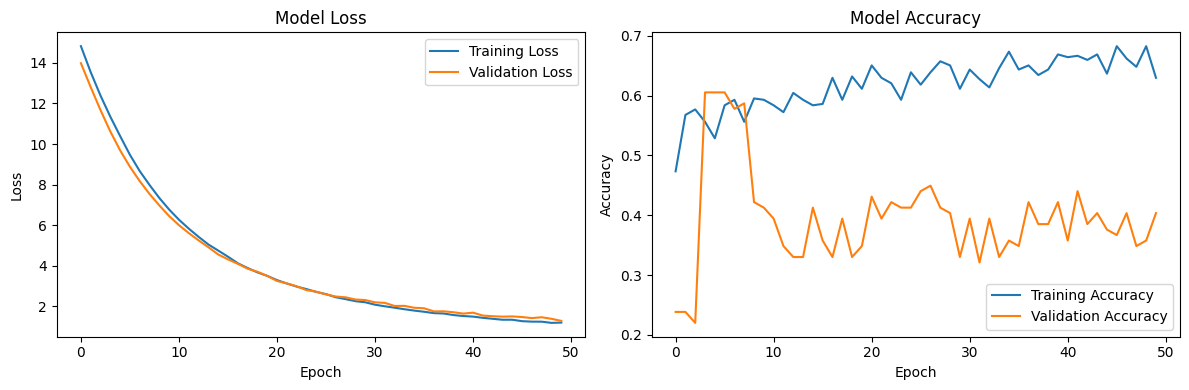

In [23]:



# Filtra e seleziona le colonne rilevanti dal DataFrame
df_cleaned2 = df_cleaned[[
    'ID',
    'Content',
    'Age',
    #'Gender_Femmina',
    'luminance',
    'contrast',
    'hue',
    'saturation',
    'motion_per_frame',
    'feature_complexity',
    'Duration AD',
    'mean_loudness',
    'onset_density',
    'mean_timbre_centroid',
    'Unaided Recall'

]]

# Raggruppa per ID e Content
grouped = df_cleaned2.groupby(['ID', 'Content'])

sequence_data = []
sequence_labels = []

# Itera sui gruppi per creare le sequenze
for (ID, Content), group in grouped:
    # Droppa le colonne non necessarie e ottieni le feature
    sequence = group.drop(columns=['ID', 'Content', 'Unaided Recall'], errors='ignore').to_numpy()

    # Estrai la recall binaria (target)
    label = group['Unaided Recall'].iloc[0]  # La recall è unica per ogni gruppo (ID, Content)

    # Aggiungi la sequenza e il target al dataset
    sequence_data.append(sequence)
    sequence_labels.append(label)

# Padding delle sequenze per gestire lunghezze variabili
X_padded = pad_sequences(sequence_data, padding='post', dtype='float32')  # Padding con zeri
y = np.array(sequence_labels)

# Controlla la forma dei dati
print("Shape di X dopo padding:", X_padded.shape)  # (n_samples, max_sequence_length, n_features)
print("Shape di y:", y.shape)  # (n_samples,)

# Suddividi il dataset in training e validation
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Applica SMOTE per bilanciare le classi
smote = SMOTE(random_state=42)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)  # Reshape per SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_reshaped, y_train)
X_train_resampled = X_train_resampled.reshape(-1, X_train.shape[1], X_train.shape[2])  # Ritorna alla forma originale

print("Shape di X_train dopo SMOTE:", X_train_resampled.shape)
print("Distribuzione delle classi dopo SMOTE:", np.unique(y_train_resampled, return_counts=True))

# Parametri del modello
max_sequence_length = X_padded.shape[1]  # Lunghezza massima dopo il padding
n_features = X_padded.shape[2]  # Numero di feature per timestep

# Set random seed for replicability
def set_seed(seed=42):
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)

# Call this function at the start of the script
set_seed(123)

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Add
from sklearn.model_selection import KFold

def create_improved_model(max_sequence_length, n_features):
    input_layer = Input(shape=(max_sequence_length, n_features))

    # First CNN block
    x = Conv1D(64, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01))(input_layer)
    x = BatchNormalization()(x)
    x = Conv1D(64, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(2)(x)
    x = Dropout(0.3)(x)

    # Second CNN block with residual connection
    residual = Conv1D(128, 1, padding='same')(x)
    x = Conv1D(128, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Conv1D(128, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Add()([x, residual])
    x = MaxPooling1D(2)(x)
    x = Dropout(0.3)(x)

    # LSTM layers
    x = Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01)))(x)
    x = Bidirectional(LSTM(64, kernel_regularizer=l2(0.01)))(x)
    x = Dropout(0.4)(x)

    # Dense layers with regularization
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    output_layer = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    return model

def train_with_kfold(X, y, n_splits=5):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []

    for fold, (train_idx, val_idx) in enumerate(kfold.split(X)):
        print(f'Fold {fold + 1}/{n_splits}')

        X_train_fold = X[train_idx]
        y_train_fold = y[train_idx]
        X_val_fold = X[val_idx]
        y_val_fold = y[val_idx]

        # Apply SMOTE only on training data
        smote = SMOTE(random_state=42)
        X_train_reshaped = X_train_fold.reshape(X_train_fold.shape[0], -1)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_reshaped, y_train_fold)
        X_train_resampled = X_train_resampled.reshape(-1, X_train_fold.shape[1], X_train_fold.shape[2])

        # Callbacks
        reduce_lr = ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=3,
            min_lr=0.00001,
            verbose=1
        )

        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True,
            verbose=1
        )

        model = create_improved_model(max_sequence_length, n_features)
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )

        history = model.fit(
            X_train_resampled,
            y_train_resampled,
            validation_data=(X_val_fold, y_val_fold),
            epochs=50,
            batch_size=32,
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )

        # Evaluate on validation set
        score = model.evaluate(X_val_fold, y_val_fold, verbose=0)
        scores.append(score[1])

    return np.mean(scores), np.std(scores)

# Train with k-fold cross-validation
mean_score, std_score = train_with_kfold(X_padded, y)
print(f'Cross-validation accuracy: {mean_score:.4f} (+/- {std_score:.4f})')

# Train final model on full dataset
# Callbacks for final training
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.00001,
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Create and train final model
model = create_improved_model(max_sequence_length, n_features)
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_resampled,
    y_train_resampled,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate on test set
y_pred = (model.predict(X_test) > 0.5).astype(int)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final F1-Score on test set: {f1:.4f}")
print(f"Final Accuracy on test set: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# ML aggregated

In [ ]:
!pip install imbalanced-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt

#reg_emg ha una colonna con un valore che è inf
numeric_reg_eng = reg_eng.select_dtypes(include=np.number)
reg_eng = reg_eng[~np.isinf(numeric_reg_eng).any(axis=1)]

# Load dataset and define dependent and independent variables
y = reg_eng['Unaided Recall']  # Dependent variable
X = reg_eng[[


    'Engagement(1/alpha) standardized',
    'Pleasantness standardized',
    'Attention standardized',
    'Engagement standardized',
    'GSR_standardized_all',
    'Pleasantness_sign_GSR_standardized',
    'Pleasantness_sign',
    'Alpha_ISC',
    'Beta_ISC',
    'Gamma_ISC',
    'Theta_ISC',
    'Delta_ISC',
    'FAA_sign',
    'FAA_sign_GSR_standardized',

    'Beta standardized',
    'Gamma standardized',
    'Alpha standardized',
    'Delta standardized',

    'AW Index standardized',
    'Vamv Valence standardized',
    'Kirk Valence standardized',
    'Ram12 Valence standardized',
    'Ram15 Valence standardized',
    'Effort Index 1 standardized',
    'Effort Index 2 standardized',
]]


# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for class balancing
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

# Confirm shapes
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train distribution: \n{y_train.value_counts()}")


## BIOMETRIC FEATURES

### ANN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Creazione del modello ANN
def create_ann_model():
    model = Sequential()

    # Input layer
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dropout(0.3))

    # Hidden layer
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compilazione del modello
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Cross-validation
n_splits = 10
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

f1_scores = []
accuracy_scores = []

for train_index, val_index in kf.split(X, y):
    X_train1, X_val1 = X.iloc[train_index], X.iloc[val_index]
    y_train1, y_val1 = y.iloc[train_index], y.iloc[val_index]

    # Crea e addestra il modello
    model = create_ann_model()
    model.fit(
        X_train1, y_train1,
        validation_data=(X_val1, y_val1),
        batch_size=32,
        epochs=50,
        verbose=1
    )

    # Previsione sul validation set
    y_pred = (model.predict(X_val1) > 0.5).astype(int)

    # Calcolo delle metriche
    f1 = f1_score(y_val1, y_pred)
    accuracy = accuracy_score(y_val1, y_pred)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

    print(f"Fold F1-Score: {f1}")
    print(f"Fold Accuracy: {accuracy}")

# Risultati medi
mean_f1 = np.mean(f1_scores)
mean_accuracy = np.mean(accuracy_scores)
print(f"\nMean F1-Score: {mean_f1}")
print(f"Mean Accuracy: {mean_accuracy}")


### XGBoost (MODELLO DEFINITIVO NON TOCCARE)

X_train shape: (544, 12), X_test shape: (119, 12)
y_train distribution: 
Unaided Recall
1    272
0    272
Name: count, dtype: int64
Best Accuracy: 0.6890756302521008
Best Parameters: {'max_depth': 3, 'learning_rate': 1, 'n_estimators': 500, 'min_child_weight': 5, 'gamma': 0.1, 'subsample': 0.8, 'colsample_bytree': 0.7}

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.55      0.62      0.58        42
           1       0.78      0.73      0.75        77

    accuracy                           0.69       119
   macro avg       0.67      0.67      0.67       119
weighted avg       0.70      0.69      0.69       119


Feature Importance (Gain):
                      Feature   Gain
5                   Gamma_ISC  101.0
2        GSR_standardized_all   91.0
8           Beta standardized   84.0
0   Pleasantness standardized   83.0
7                   Delta_ISC   82.0
9          Gamma standardized   78.0
10         Alpha standardi

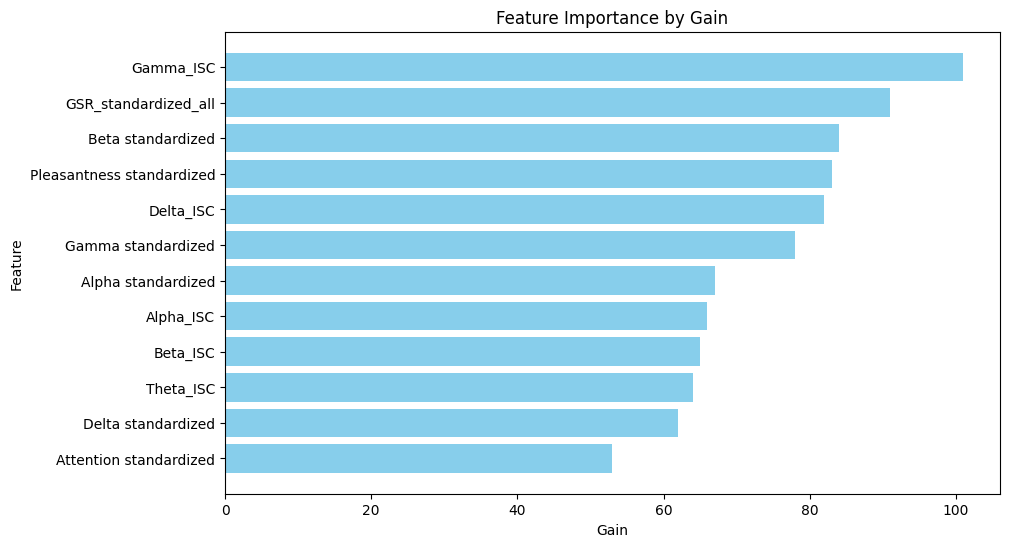

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt

#reg_emg ha una colonna con un valore che è inf
numeric_reg_eng = reg_eng.select_dtypes(include=np.number)
reg_eng = reg_eng[~np.isinf(numeric_reg_eng).any(axis=1)]

#we did a variable selection keeping only one out of all the indicators aiming at the same things
# Load dataset and define dependent and independent variables
y = reg_eng['Unaided Recall']  # Dependent variable
X = reg_eng[[


    #'Engagement(1/alpha) standardized',
    'Pleasantness standardized',
    'Attention standardized',
    # 'Engagement standardized',
    'GSR_standardized_all',
    # 'Pleasantness_sign_GSR_standardized',
    # 'Pleasantness_sign',
    'Alpha_ISC',
    'Beta_ISC',
    'Gamma_ISC',
    'Theta_ISC',
    'Delta_ISC',
    # 'FAA_sign',
    # 'FAA_sign_GSR_standardized',

    'Beta standardized',
    'Gamma standardized',
    'Alpha standardized',
    'Delta standardized',

    #'AW Index standardized',
    #'Vamv Valence standardized',
    # 'Kirk Valence standardized',
    # 'Ram12 Valence standardized',
    # 'Ram15 Valence standardized',
    #'Effort Index 1 standardized',
    # 'Effort Index 2 standardized',
]]


# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Confirm shapes
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train distribution: \n{y_train.value_counts()}")

xgb_param_grid = {
    'max_depth': [3, 5, 7],  # Tree depth
    'learning_rate':[1, 0.1, 0.01],  # Step size shrinkage
    'n_estimators': [750, 500, 1000],  # Number of trees
    'min_child_weight': [1, 3, 5],
    'gamma':[0.1, 0.01, 0.5],
    'subsample': [0.8, 0.6, 0.9],
    'colsample_bytree': [0.5, 0.3, 0.7],
}

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize variables to track the best model
best_score_xgb = -1  # Initialize to a value lower than possible accuracies
best_params_xgb = None
best_model = None  # To store the best model
best_y_pred = None  # To store predictions of the best model

# Perform grid search manually
for max_depth in xgb_param_grid['max_depth']:
    for learning_rate in xgb_param_grid['learning_rate']:
        for n_estimators in xgb_param_grid['n_estimators']:
            for min_child_weight in xgb_param_grid.get('min_child_weight', [1]):
                for gamma in xgb_param_grid.get('gamma', [0]):
                    for subsample in xgb_param_grid.get('subsample', [1.0]):
                        for colsample_bytree in xgb_param_grid.get('colsample_bytree', [1.0]):
                            try:
                                # Train the model with current parameters
                                model = XGBClassifier(
                                    max_depth=max_depth,
                                    learning_rate=learning_rate,
                                    n_estimators=n_estimators,
                                    min_child_weight=min_child_weight,
                                    gamma=gamma,
                                    subsample=subsample,
                                    colsample_bytree=colsample_bytree,
                                    random_state=42
                                )
                                model.fit(X_train, y_train)

                                # Predict on the test set
                                y_pred = model.predict(X_test)
                                current_accuracy = accuracy_score(y_test, y_pred)

                                # Compare the accuracy and update the best model
                                if current_accuracy > best_score_xgb:
                                    best_score_xgb = current_accuracy
                                    best_params_xgb = {
                                        'max_depth': max_depth,
                                        'learning_rate': learning_rate,
                                        'n_estimators': n_estimators,
                                        'min_child_weight': min_child_weight,
                                        'gamma': gamma,
                                        'subsample': subsample,
                                        'colsample_bytree': colsample_bytree
                                    }
                                    best_model = model
                                    best_y_pred = y_pred  # Save predictions from the best model
                            except Exception as e:
                                print(f"Error for parameters: max_depth={max_depth}, learning_rate={learning_rate}, n_estimators={n_estimators}, min_child_weight={min_child_weight}, gamma={gamma}, subsample={subsample}, colsample_bytree={colsample_bytree}\nError: {e}")

# Check if a best model was found
if best_model is not None:
    # Print the best parameters and score
    print("Best Accuracy:", best_score_xgb)
    print("Best Parameters:", best_params_xgb)

    # Print the classification report for the best model
    from sklearn.metrics import classification_report
    print("\nClassification Report for Best Model:")
    print(classification_report(y_test, best_y_pred))
else:
    print("No valid model was found during the grid search.")

import pandas as pd
import matplotlib.pyplot as plt

feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature_{i}' for i in range(X_train.shape[1])]

# Ottieni l'importanza delle feature con il gain
feature_importance_gain = best_model.get_booster().get_score(importance_type='weight')

# Crea un DataFrame per una visualizzazione migliore
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Gain': [feature_importance_gain.get(f, 0) for f in feature_names]
}).sort_values(by='Gain', ascending=False)

# Mostra l'importanza delle feature
print("\nFeature Importance (Gain):")
print(feature_importance_df)

# Grafico delle feature più importanti basato sul gain
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Gain'], color='skyblue')
plt.xlabel('Gain')
plt.ylabel('Feature')
plt.title('Feature Importance by Gain')
plt.gca().invert_yaxis()
plt.show()


#### kfold XGBOOST

Fold 1/3
Fold 2/3
Fold 3/3

Final Cross-Validation Results:
Average Accuracy: 0.5288 ± 0.0304
Average AUC: 0.5149 ± 0.0316

Classification Report (Averaged):
                           Average
0_precision               0.430342
0_recall                  0.434381
0_f1-score                0.431326
0_support                82.000000
1_precision               0.599283
1_recall                  0.595470
1_f1-score                0.596630
1_support               116.333333
accuracy                  0.528827
macro avg_precision       0.514812
macro avg_recall          0.514926
macro avg_f1-score        0.513978
macro avg_support       198.333333
weighted avg_precision    0.529436
weighted avg_recall       0.528827
weighted avg_f1-score     0.528266
weighted avg_support    198.333333


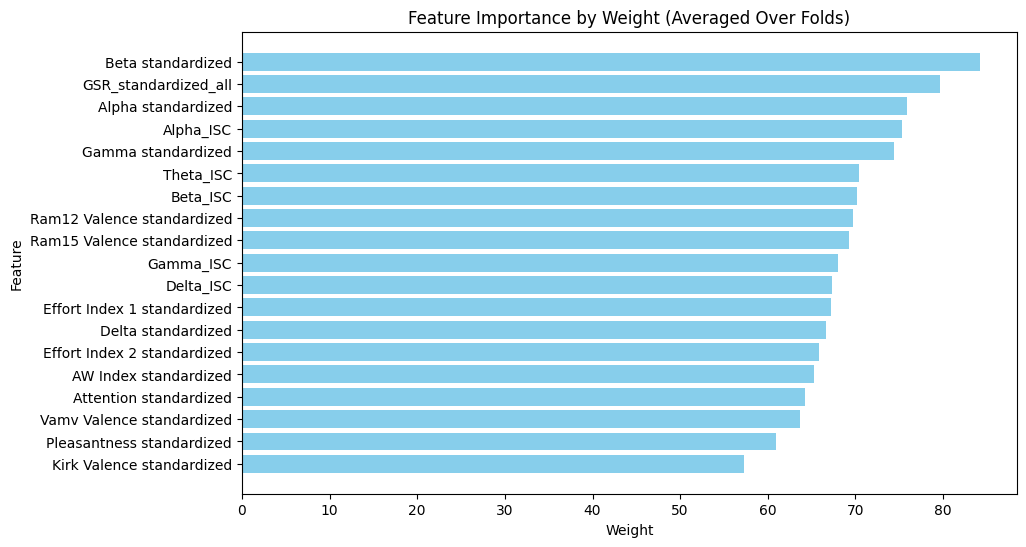

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import collections

# Define the number of folds for cross-validation
n_splits = 3  # You can adjust this number based on your dataset size
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)



y = reg_eng['Unaided Recall']  # Dependent variable
X = reg_eng[[


    #'Engagement(1/alpha) standardized',
    'Pleasantness standardized',
    'Attention standardized',
    # 'Engagement standardized',
    'GSR_standardized_all',
    # 'Pleasantness_sign_GSR_standardized',
    # 'Pleasantness_sign',
    'Alpha_ISC',
    'Beta_ISC',
    'Gamma_ISC',
    'Theta_ISC',
    'Delta_ISC',
    # 'FAA_sign',
    # 'FAA_sign_GSR_standardized',

    'Beta standardized',
    'Gamma standardized',
    'Alpha standardized',
    'Delta standardized',

    'AW Index standardized',
    'Vamv Valence standardized',
    'Kirk Valence standardized',
    'Ram12 Valence standardized',
    'Ram15 Valence standardized',
    'Effort Index 1 standardized',
    'Effort Index 2 standardized',
]]




# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.3, 1],
    'n_estimators': [100, 500, 1000],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.3, 0.5, 0.7],
}

# Store results across folds
accuracy_scores = []
auc_scores = []
classification_reports = []
feature_importance_agg = {}

# Initialize best model tracking
best_model = None
best_score = -1
best_params = None
best_y_true = None
best_y_pred = None

# Perform K-Fold Cross-Validation
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
    print(f"Fold {fold + 1}/{n_splits}")

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Apply SMOTE for class balancing
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    # Iterate over hyperparameter grid
    for max_depth in param_grid['max_depth']:
        for learning_rate in param_grid['learning_rate']:
            for n_estimators in param_grid['n_estimators']:
                for min_child_weight in param_grid['min_child_weight']:
                    for gamma in param_grid['gamma']:
                        for subsample in param_grid['subsample']:
                            for colsample_bytree in param_grid['colsample_bytree']:
                                # Train the XGBoost model
                                model = XGBClassifier(
                                    max_depth=max_depth,
                                    learning_rate=learning_rate,
                                    n_estimators=n_estimators,
                                    min_child_weight=min_child_weight,
                                    gamma=gamma,
                                    subsample=subsample,
                                    colsample_bytree=colsample_bytree,
                                    random_state=42
                                )
                                model.fit(X_train, y_train)

                                # Predict on test set
                                y_pred = model.predict(X_test)

                                # Evaluate metrics
                                acc = accuracy_score(y_test, y_pred)
                                auc = roc_auc_score(y_test, y_pred)
                                report = classification_report(y_test, y_pred, output_dict=True)

                                accuracy_scores.append(acc)
                                auc_scores.append(auc)
                                classification_reports.append(report)

                                # Track best model
                                if acc > best_score:
                                    best_score = acc
                                    best_model = model
                                    best_params = model.get_params()
                                    best_y_true = y_test
                                    best_y_pred = y_pred

                                # Collect feature importance
                                feature_importance = model.get_booster().get_score(importance_type='weight')
                                for feature, value in feature_importance.items():
                                    if feature not in feature_importance_agg:
                                        feature_importance_agg[feature] = []
                                    feature_importance_agg[feature].append(value)

# Compute mean feature importance across folds
feature_importance_avg = {
    feature: np.mean(values) for feature, values in feature_importance_agg.items()
}

# Create DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_importance_avg.keys(),
    'Weight': feature_importance_avg.values()
}).sort_values(by='Weight', ascending=False)

# Print final averaged metrics
print("\nFinal Cross-Validation Results:")
print(f"Average Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print(f"Average AUC: {np.mean(auc_scores):.4f} ± {np.std(auc_scores):.4f}")

# Convert classification reports to DataFrame and average them
avg_classification_report = collections.defaultdict(list)
for report in classification_reports:
    for key, value in report.items():
        if isinstance(value, dict):  # Handling nested precision/recall/f1-score dict
            for sub_key, sub_value in value.items():
                avg_classification_report[f"{key}_{sub_key}"].append(sub_value)
        else:
            avg_classification_report[key].append(value)

# Compute the mean of each metric across all folds
final_report = {metric: np.mean(values) for metric, values in avg_classification_report.items()}

# Convert to DataFrame for a clean output
final_report_df = pd.DataFrame(final_report, index=["Average"]).T
print("\nClassification Report (Averaged):")
print(final_report_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Weight'], color='skyblue')
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.title('Feature Importance by Weight (Averaged Over Folds)')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import shap
import numpy as np

# 1. Make sure you have your best_model (already found via your grid search).
best_model  # This should be your trained XGBClassifier

# 2. Create the explainer using your best_model
explainer = shap.TreeExplainer(best_model)

# 3. Compute SHAP values on the test set
#    For binary classification with XGBoost, shap_values will typically be a 2D array of shape (n_samples, n_features).
#    If you see a 3D array (e.g., (n_samples, 2, n_features)), you can select shap_values for the positive class,
#    e.g. shap_values = shap_values[:, 1, :]
shap_values = explainer.shap_values(X_test)

# Convert to a DataFrame for easier inspection: each row is a sample, each column is a feature.
shap_values_df = pd.DataFrame(shap_values, columns=X_test.columns)

# 4. Show average SHAP value (which can be positive or negative) per feature
#    This indicates overall direction (whether on average the feature pushes the prediction up or down).
mean_shap = shap_values_df.mean(axis=0).sort_values(ascending=False)

print("Average SHAP values (direction) per feature:")
print(mean_shap)

# 5. Show average absolute SHAP value (magnitude) per feature
#    This indicates how strongly (regardless of sign) each feature influences the model predictions on average.
mean_abs_shap = shap_values_df.abs().mean(axis=0).sort_values(ascending=False)

print("\nAverage |SHAP| values (magnitude) per feature:")
print(mean_abs_shap)



In [ ]:

# Create a DataFrame for better visualization
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature_{i}' for i in range(X_train.shape[1])]

# Ottieni l'importanza delle feature con il gain
feature_importance_gain = best_model.get_booster().get_score(importance_type='gain')

# Crea un DataFrame per una visualizzazione migliore
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Gain': [feature_importance_gain.get(f, 0) for f in feature_names]
}).sort_values(by='Gain', ascending=False)

# Mostra l'importanza delle feature
print("\nFeature Importance (Gain):")
print(feature_importance_df)

# Grafico delle feature più importanti basato sul gain
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Gain'], color='skyblue')
plt.xlabel('Gain')
plt.ylabel('Feature')
plt.title('Feature Importance by Gain')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
print(classification_report(y_test, best_y_pred))

### FORESTA RANDOMICA

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
#reg_emg ha una colonna con un valore che è inf
numeric_reg_eng = reg_eng.select_dtypes(include=np.number)
reg_eng = reg_eng[~np.isinf(numeric_reg_eng).any(axis=1)]

#we did a variable selection keeping only one out of all the indicators aiming at the same things
# Load dataset and define dependent and independent variables
y = reg_eng['Unaided Recall']  # Dependent variable
X = reg_eng[[


    'Engagement(1/alpha) standardized',
    'Pleasantness standardized',
    'Attention standardized',
    # 'Engagement standardized',
    'GSR_standardized_all',
    # 'Pleasantness_sign_GSR_standardized',
    # 'Pleasantness_sign',
    'Alpha_ISC',
    'Beta_ISC',
    'Gamma_ISC',
    'Theta_ISC',
    'Delta_ISC',
    # 'FAA_sign',
    # 'FAA_sign_GSR_standardized',

    'Beta standardized',
    'Gamma standardized',
    # 'Alpha standardized',
    'Delta standardized',

    'AW Index standardized',
    'Vamv Valence standardized',
    'Kirk Valence standardized',
    'Ram12 Valence standardized',
    'Ram15 Valence standardized',
    'Effort Index 1 standardized',
    # 'Effort Index 2 standardized',
]]


# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Confirm shapes
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train distribution: \n{y_train.value_counts()}")


# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100],  # Number of trees in the forest
    'max_depth': [ 10],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],              # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None],     # Number of features to consider when looking for the best split
}

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best Random Forest Model
best_rf_model = grid_search_rf.best_estimator_

# Print the best parameters and best score
print("\nBest Parameters for Random Forest:")
print(grid_search_rf.best_params_)
print(f"Best Cross-Validation Score: {grid_search_rf.best_score_:.4f}")

# Predict on the test set
rf_y_pred = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"\nRandom Forest Test Accuracy: {rf_accuracy:.4f}")
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, rf_y_pred))

# Feature importance for Random Forest
rf_feature_importance = pd.DataFrame({
    'Feature': X_train.columns if hasattr(X_train, 'columns') else [f'Feature_{i}' for i in range(X_train.shape[1])],
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Print Feature Importance
print("\nFeature Importance (Random Forest):")
print(rf_feature_importance)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance['Feature'], rf_feature_importance['Importance'], color='lightgreen')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

NameError: name 'train_test_split' is not defined

### Remaining Models
*Herby* we summarized the remaining ML models that we tried but which achieved worst results than the aforementioned  


Running Grid Search for Logistic Regression...
Fitting 3 folds for each of 3 candidates, totalling 9 fits

Logistic Regression Best Cross-Validation Accuracy: 0.5697
Logistic Regression Test Accuracy: 0.5546
Best Parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.40      0.50      0.44        42
           1       0.68      0.58      0.63        77

    accuracy                           0.55       119
   macro avg       0.54      0.54      0.54       119
weighted avg       0.58      0.55      0.56       119


Running Grid Search for Random Forest...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Random Forest Best Cross-Validation Accuracy: 0.6195
Random Forest Test Accuracy: 0.5798
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Classification Report for Random Forest:
             

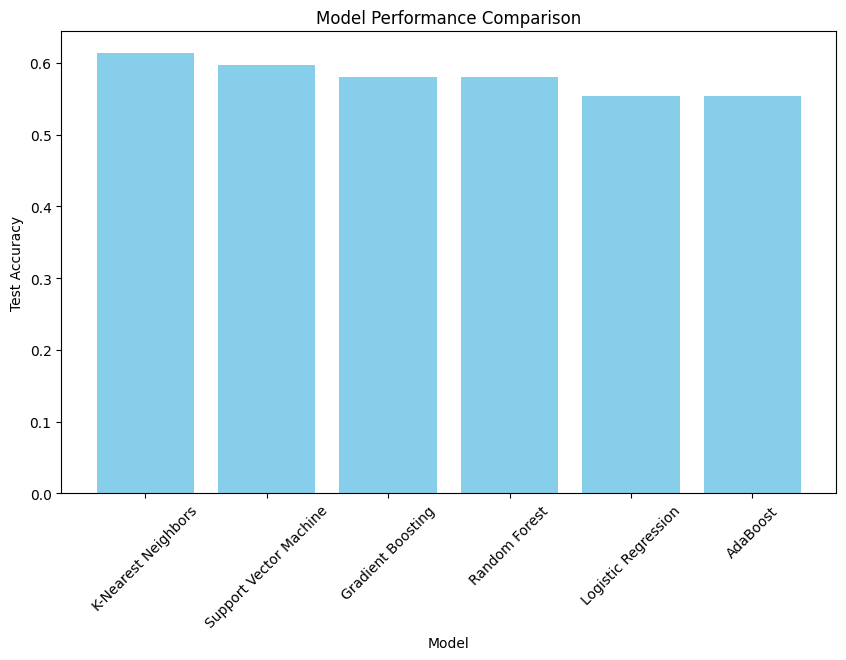

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt


#reg_emg ha una colonna con un valore che è inf
numeric_reg_eng = reg_eng.select_dtypes(include=np.number)
reg_eng = reg_eng[~np.isinf(numeric_reg_eng).any(axis=1)]

#we did a variable selection keeping only one out of all the indicators aiming at the same things
# Load dataset and define dependent and independent variables
y = reg_eng['Unaided Recall']  # Dependent variable
X = reg_eng[[


    'Engagement(1/alpha) standardized',
    'Pleasantness standardized',
    'Attention standardized',
    # 'Engagement standardized',
    'GSR_standardized_all',
    # 'Pleasantness_sign_GSR_standardized',
    # 'Pleasantness_sign',
    'Alpha_ISC',
    'Beta_ISC',
    'Gamma_ISC',
    'Theta_ISC',
    'Delta_ISC',
    # 'FAA_sign',
    # 'FAA_sign_GSR_standardized',

    'Beta standardized',
    'Gamma standardized',
    # 'Alpha standardized',
    'Delta standardized',

    'AW Index standardized',
    'Vamv Valence standardized',
    'Kirk Valence standardized',
    'Ram12 Valence standardized',
    'Ram15 Valence standardized',
    'Effort Index 1 standardized',
    # 'Effort Index 2 standardized',
]]


# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
# Function to perform grid search and evaluate the best model
def grid_search_and_evaluate(model, param_grid, model_name):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best model from grid search
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Test the model on the test set
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    print(f"\n{model_name} Best Cross-Validation Accuracy: {best_score:.4f}")
    print(f"{model_name} Test Accuracy: {test_accuracy:.4f}")
    print(f"Best Parameters for {model_name}: {best_params}")
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")

    return model_name, test_accuracy, best_model, best_params

# Reduced Grid Search Parameters
param_grids = {
    "Logistic Regression": {
        "model": LogisticRegression(random_state=42, max_iter=500),
        "params": {"C": [0.1, 1, 10], "solver": ["liblinear"]},
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10],
            "min_samples_split": [2, 5],
        },
    },
    "Support Vector Machine": {
        "model": SVC(random_state=42),
        "params": {"C": [1, 10], "kernel": ["linear", "rbf"]},
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.1, 0.2],
            "max_depth": [3, 5],
        },
    },
    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "learning_rate": [0.5, 1],
        },
    },
    "K-Nearest Neighbors": {
        "model": KNeighborsClassifier(),
        "params": {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"], "metric": ["euclidean", "manhattan"]},
    },
}

# Run Grid Search for each model
results = []
for model_name, model_data in param_grids.items():
    print(f"\nRunning Grid Search for {model_name}...")
    model, param_grid = model_data["model"], model_data["params"]
    result = grid_search_and_evaluate(model, param_grid, model_name)
    results.append(result)

# Compare the performance of the models
performance_df = pd.DataFrame(results, columns=["Model", "Test Accuracy", "Best Model", "Best Parameters"])
performance_df = performance_df.sort_values(by="Test Accuracy", ascending=False)

# Display performance comparison
print("\nPerformance Comparison:")
print(performance_df[["Model", "Test Accuracy", "Best Parameters"]])

# Plot the model performance
plt.figure(figsize=(10, 6))
plt.bar(performance_df["Model"], performance_df["Test Accuracy"], color="skyblue")
plt.xlabel("Model")
plt.ylabel("Test Accuracy")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)
plt.show()

## VIDEO FEATURES

In [ ]:
reg_eng.columns

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt

#reg_emg ha una colonna con un valore che è inf
numeric_reg_eng = reg_eng.select_dtypes(include=np.number)
reg_eng = reg_eng[~np.isinf(numeric_reg_eng).any(axis=1)]

# Load dataset and define dependent and independent variables
y = reg_eng['Unaided Recall']  # Dependent variable
X = reg_eng[[
    # 'Device_TV',
    # 'Device_Smartphone',
    'Age',
    'Gender_Femmina',
    # 'BRAND',
    'luminance',
    'contrast',
    'hue',
    'saturation',
    # 'texture_contrast',
    # 'num_edges',
    'motion_video',
    'feature_complexity',
    # 'hog_features',
    # 'diff_percent',
    # 'Position',
    # 'First_Brand',
    # 'Duration AD',
    # 'Classifica',

    'luminance_std',
    'saturation_std',
    'hue_std',
    'contrast_std',
    'feature_complexity_std',
    'motion_per_frame_std',
    # 'volume_dbfs_std',
    # 'diff_percent_std',
    'mean_loudness',
    'std_loudness',
    'onset_density',
    'mean_timbre_centroid',
    'std_timbre_centroid'


]]


# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Confirm shapes
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train distribution: \n{y_train.value_counts()}")


NameError: name 'reg_eng' is not defined

### XGBoost

Best Test Accuracy: 0.6387
Best Parameters: max_depth=2, learning_rate=0.1, n_estimators=500

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.49      0.48      0.48        42
           1       0.72      0.73      0.72        77

    accuracy                           0.64       119
   macro avg       0.60      0.60      0.60       119
weighted avg       0.64      0.64      0.64       119


Feature Importance (Gain):
                             Feature      Gain
14       Effort Index 1 standardized  2.735099
3               GSR_standardized_all  2.538384
6                          Gamma_ISC  2.018364
0   Engagement(1/alpha) standardized  2.015646
1          Pleasantness standardized  1.918688
7                          Theta_ISC  1.835548
4                          Alpha_ISC  1.824386
12             AW Index standardized  1.819678
2             Attention standardized  1.791335
9                  Beta standardized  1.738

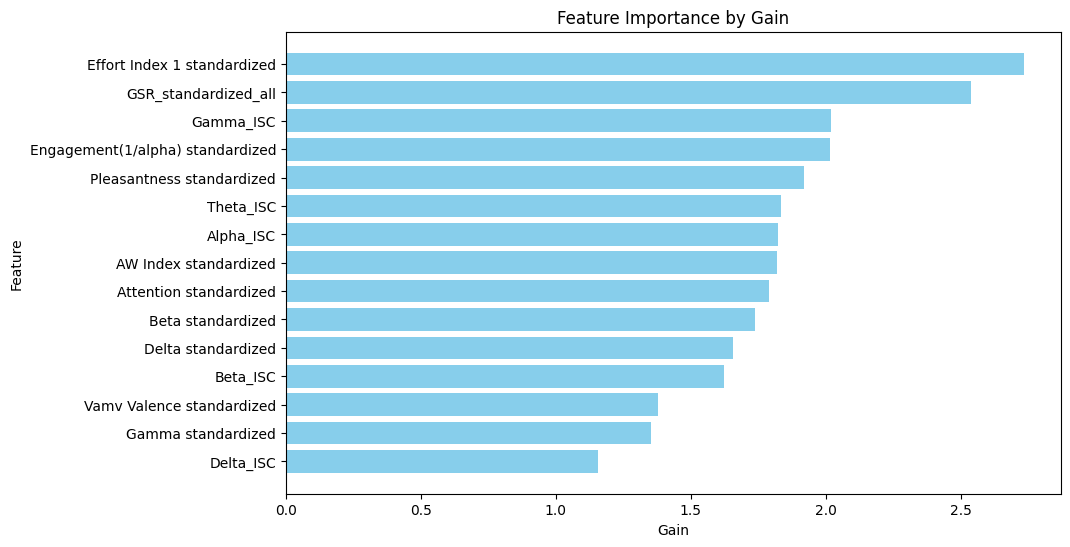

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid
# xgb_param_grid = {
#     'max_depth': [2],          # Tree depth
#     'learning_rate': [0.1],  # Step size shrinkage
#     'n_estimators': [500]       # Number of trees
# }
xgb_param_grid = {
    'max_depth': [2, 5, 10],          # Tree depth
    'learning_rate': [0.1,1,0.01],  # Step size shrinkage
    'n_estimators': [500, 1000, 2000]       # Number of trees
}
# Initialize variables to track the best model
best_score_xgb = 0.0
best_params_xgb = None
best_model = None  # To store the best model
best_y_pred = None  # To store predictions of the best model

# Perform grid search manually
for max_depth in xgb_param_grid['max_depth']:
    for learning_rate in xgb_param_grid['learning_rate']:
        for n_estimators in xgb_param_grid['n_estimators']:
            # Train the model with current parameters
            model = XGBClassifier(
                max_depth=max_depth,
                learning_rate=learning_rate,
                n_estimators=n_estimators,
                random_state=42
            )
            model.fit(X_train, y_train)

            # Predict on the test set
            y_pred = model.predict(X_test)
            current_accuracy = accuracy_score(y_test, y_pred)

            # Compare the accuracy and update the best model
            if current_accuracy > best_score_xgb:
                best_score_xgb = current_accuracy
                best_params_xgb = (max_depth, learning_rate, n_estimators)
                best_model = model
                best_y_pred = y_pred  # Save predictions from the best model

# Print the best accuracy and corresponding parameters
print(f"Best Test Accuracy: {best_score_xgb:.4f}")
print(f"Best Parameters: max_depth={best_params_xgb[0]}, learning_rate={best_params_xgb[1]}, n_estimators={best_params_xgb[2]}")

# Print the classification report for the best model
print("\nClassification Report for Best Model:")
print(classification_report(y_test, best_y_pred))
import pandas as pd
import matplotlib.pyplot as plt

# Assuming best_model is the trained XGBoost model
# If you're using GridSearchCV, use `best_model = xgb_grid.best_estimator_`


# Create a DataFrame for better visualization
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature_{i}' for i in range(X_train.shape[1])]

# Ottieni l'importanza delle feature con il gain
feature_importance_gain = best_model.get_booster().get_score(importance_type='gain')

# Crea un DataFrame per una visualizzazione migliore
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Gain': [feature_importance_gain.get(f, 0) for f in feature_names]
}).sort_values(by='Gain', ascending=False)

# Mostra l'importanza delle feature
print("\nFeature Importance (Gain):")
print(feature_importance_df)

# Grafico delle feature più importanti basato sul gain
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Gain'], color='skyblue')
plt.xlabel('Gain')
plt.ylabel('Feature')
plt.title('Feature Importance by Gain')
plt.gca().invert_yaxis()
plt.show()

### Remaining models


Running Grid Search for Logistic Regression...
Fitting 3 folds for each of 3 candidates, totalling 9 fits

Logistic Regression Best Cross-Validation Accuracy: 0.5936
Logistic Regression Test Accuracy: 0.5966
Best Parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.44      0.52      0.48        42
           1       0.71      0.64      0.67        77

    accuracy                           0.60       119
   macro avg       0.58      0.58      0.57       119
weighted avg       0.61      0.60      0.60       119


Running Grid Search for Random Forest...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Random Forest Best Cross-Validation Accuracy: 0.6214
Random Forest Test Accuracy: 0.5798
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Classification Report for Random Forest:
             

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:52:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


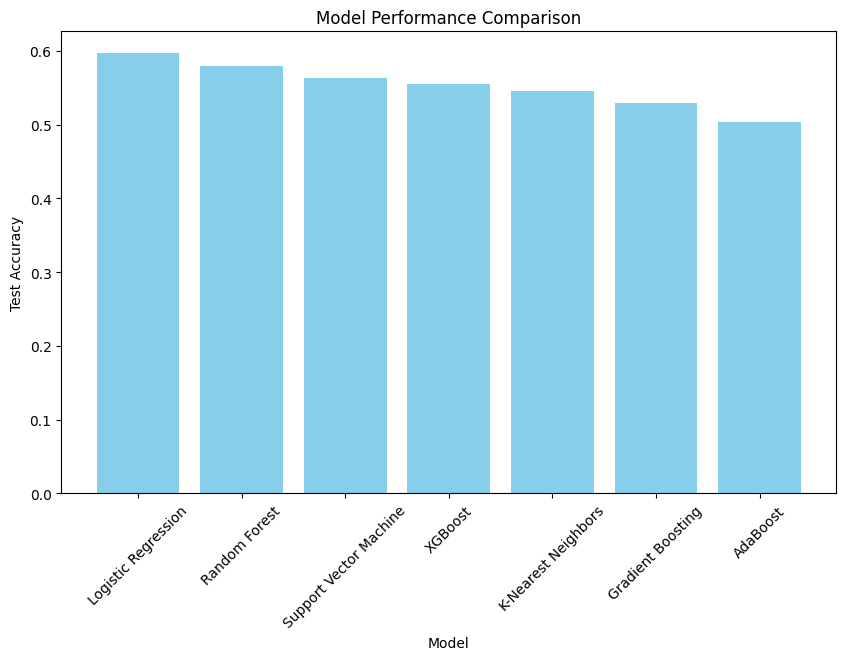

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Function to perform grid search and evaluate the best model
def grid_search_and_evaluate(model, param_grid, model_name):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best model from grid search
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Test the model on the test set
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    print(f"\n{model_name} Best Cross-Validation Accuracy: {best_score:.4f}")
    print(f"{model_name} Test Accuracy: {test_accuracy:.4f}")
    print(f"Best Parameters for {model_name}: {best_params}")
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")

    return model_name, test_accuracy, best_model, best_params

# Reduced Grid Search Parameters
param_grids = {
    "Logistic Regression": {
        "model": LogisticRegression(random_state=42, max_iter=500),
        "params": {"C": [0.1, 1, 10], "solver": ["liblinear"]},
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10],
            "min_samples_split": [2, 5],
        },
    },
    "Support Vector Machine": {
        "model": SVC(random_state=42),
        "params": {"C": [1, 10], "kernel": ["linear", "rbf"]},
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.1, 0.2],
            "max_depth": [3, 5],
        },
    },
    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=42),
        "params": {
            "n_estimators": [1000],
            "learning_rate": [0.1],
        },
    },
    "K-Nearest Neighbors": {
        "model": KNeighborsClassifier(),
        "params": {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"], "metric": ["euclidean", "manhattan"]},
    },
}

# Run Grid Search for models excluding XGBoost
results = []
for model_name, model_data in param_grids.items():
    print(f"\nRunning Grid Search for {model_name}...")
    model, param_grid = model_data["model"], model_data["params"]
    result = grid_search_and_evaluate(model, param_grid, model_name)
    results.append(result)

# Manual parameter tuning for XGBoost
xgb_param_grid = {
    "max_depth": [2],
    "learning_rate": [0.01],
    "n_estimators": [1000],
}
best_score_xgb = 0.0
best_params_xgb = None
best_model_xgb = None

print("\nRunning Manual Parameter Tuning for XGBoost...")
for max_depth in xgb_param_grid["max_depth"]:
    for learning_rate in xgb_param_grid["learning_rate"]:
        for n_estimators in xgb_param_grid["n_estimators"]:
            model = XGBClassifier(
                max_depth=max_depth,
                learning_rate=learning_rate,
                n_estimators=n_estimators,
                random_state=42,
                use_label_encoder=False,
                eval_metric="logloss"
            )
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            test_accuracy = accuracy_score(y_test, y_pred)

            if test_accuracy > best_score_xgb:
                best_score_xgb = test_accuracy
                best_params_xgb = {"max_depth": max_depth, "learning_rate": learning_rate, "n_estimators": n_estimators}
                best_model_xgb = model

print(f"\nXGBoost Best Test Accuracy: {best_score_xgb:.4f}")
print(f"Best Parameters for XGBoost: {best_params_xgb}")
print(f"Classification Report for XGBoost:\n{classification_report(y_test, best_model_xgb.predict(X_test))}")

# Add XGBoost results to the comparison
results.append(("XGBoost", best_score_xgb, best_model_xgb, best_params_xgb))

# Compare the performance of the models
performance_df = pd.DataFrame(results, columns=["Model", "Test Accuracy", "Best Model", "Best Parameters"])
performance_df = performance_df.sort_values(by="Test Accuracy", ascending=False)

# Display performance comparison
print("\nPerformance Comparison:")
print(performance_df[["Model", "Test Accuracy", "Best Parameters"]])

# Plot the model performance
plt.figure(figsize=(10, 6))
plt.bar(performance_df["Model"], performance_df["Test Accuracy"], color="skyblue")
plt.xlabel("Model")
plt.ylabel("Test Accuracy")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)
plt.show()

# MODELLI REGRESSIONE CON ONDE

In [ ]:
#rimuoviamo l'unoco partecipante che ha inserito 'Altro' in Gender, in quanto da solo non può adeguatamente rappresentare la sua categoria
df_cleaned=df_cleaned[~(df_cleaned['Gender']=='Altro/Preferisco non rispondere')]

#Create the dummy Gender_Femina
df_cleaned['Gender_Femmina'] = df_cleaned['Gender'].apply(lambda x: 1 if x == 'Femmina' else 0)


#Dummy for Device
df_cleaned = pd.get_dummies(df_cleaned, columns=['Device'], prefix='Device', drop_first=True)
df_cleaned[['Device_TV', 'Device_Smartphone']] = df_cleaned[['Device_TV', 'Device_Smartphone']].astype('int')




## GAMMA

In [ ]:
import statsmodels.api as sm

predictors = [
    'Gender_Femmina', 'Age',
    'luminance',
    'contrast',
    'saturation', 'hue',
    'feature_complexity',
    'motion_video' ,
    'luminance_std',
    'saturation_std',
    'hue_std',
    'contrast_std',
    'feature_complexity_std',
    'motion_per_frame_std',
    'luminance_std',
    'saturation_std',
    'hue_std',
    'contrast_std',
    'feature_complexity_std',
    'motion_per_frame_std',
    'mean_loudness',
    'std_loudness',
    'onset_density',
    'mean_timbre_centroid',
    'std_timbre_centroid'
]
target = 'Gamma standardized' #    Beta standardized   Engagement(1/alpha) standardized     Pleasantness standardized        Effort Index 1 standardized  Gamma standardized

# Controlla se ci sono valori mancanti e rimuovili
df_cleaned = reg_eng.dropna(subset=predictors + [target])  # Rimuove righe con valori mancanti


# Funzione per rimuovere outliers basati sull'IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # Primo quartile
        Q3 = df[col].quantile(0.75)  # Terzo quartile
        IQR = Q3 - Q1  # Intervallo interquartile
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Mantieni solo i valori all'interno dei limiti
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


# Applica la funzione per rimuovere gli outliers
columns_to_check = predictors + [target]
df_no_outliers = remove_outliers(df_cleaned.copy(), columns_to_check)
# Rimuovi eventuali valori mancanti
df_no_outliers = df_no_outliers.dropna(subset=predictors + [target])
# Separazione delle variabili indipendenti e dipendente
X = df_no_outliers[predictors]
y = df_no_outliers[target]

# Aggiungi una costante (intercetta) ai predittori
X = sm.add_constant(X)

# Crea il modello di regressione lineare
model = sm.OLS(y, X).fit()

# Stampa il sommario del modello
print(model.summary())

## BETA

In [ ]:
target = 'Beta standardized' #    Beta standardized   Engagement(1/alpha) standardized     Pleasantness standardized        Effort Index 1 standardized  Gamma standardized


# Applica la funzione per rimuovere gli outliers
columns_to_check = predictors + [target]
df_no_outliers = remove_outliers(df_cleaned.copy(), columns_to_check)
# Rimuovi eventuali valori mancanti
df_no_outliers = df_no_outliers.dropna(subset=predictors + [target])
# Separazione delle variabili indipendenti e dipendente
X = df_no_outliers[predictors]
y = df_no_outliers[target]

# Aggiungi una costante (intercetta) ai predittori
X = sm.add_constant(X)

# Crea il modello di regressione lineare
model = sm.OLS(y, X).fit()

# Stampa il sommario del modello
print(model.summary())

## ENGAGEMENT

In [ ]:
target = 'Engagement(1/alpha) standardized'


# Applica la funzione per rimuovere gli outliers
columns_to_check = predictors + [target]
df_no_outliers = remove_outliers(df_cleaned.copy(), columns_to_check)
# Rimuovi eventuali valori mancanti
df_no_outliers = df_no_outliers.dropna(subset=predictors + [target])
# Separazione delle variabili indipendenti e dipendente
X = df_no_outliers[predictors]
y = df_no_outliers[target]

# Aggiungi una costante (intercetta) ai predittori
X = sm.add_constant(X)

# Crea il modello di regressione lineare
model = sm.OLS(y, X).fit()

# Stampa il sommario del modello
print(model.summary())

## EFFORT

In [ ]:
target = 'Effort Index 1 standardized' #    Beta standardized   Engagement(1/alpha) standardized     Pleasantness standardized        Effort Index 1 standardized  Gamma standardized


# Applica la funzione per rimuovere gli outliers
columns_to_check = predictors + [target]
df_no_outliers = remove_outliers(df_cleaned.copy(), columns_to_check)
# Rimuovi eventuali valori mancanti
df_no_outliers = df_no_outliers.dropna(subset=predictors + [target])
# Separazione delle variabili indipendenti e dipendente
X = df_no_outliers[predictors]
y = df_no_outliers[target]

# Aggiungi una costante (intercetta) ai predittori
X = sm.add_constant(X)

# Crea il modello di regressione lineare
model = sm.OLS(y, X).fit()

# Stampa il sommario del modello
print(model.summary())

## PLEASANTNESS

In [ ]:
target = 'Pleasantness standardized' #    Beta standardized   Engagement(1/alpha) standardized     Pleasantness standardized        Effort Index 1 standardized  Gamma standardized


# Applica la funzione per rimuovere gli outliers
columns_to_check = predictors + [target]
df_no_outliers = remove_outliers(df_cleaned.copy(), columns_to_check)
# Rimuovi eventuali valori mancanti
df_no_outliers = df_no_outliers.dropna(subset=predictors + [target])
# Separazione delle variabili indipendenti e dipendente
X = df_no_outliers[predictors]
y = df_no_outliers[target]

# Aggiungi una costante (intercetta) ai predittori
X = sm.add_constant(X)

# Crea il modello di regressione lineare
model = sm.OLS(y, X).fit()

# Stampa il sommario del modello
print(model.summary())

# Correlations


In [ ]:
df_cleaned.columns

Index(['ID', 'Content', 'Device', 'Protocol', 'Vision', 'Position',
       'Workload_mean', 'Workload_mean2', 'SASI', 'Engagement standardized',
       ...
       'BRAND_X_MOTION_VIDEO', 'BRAND_X_LUMINANCE', 'BRAND_X_HUE',
       'BRAND_X_SATURATION', 'BRAND_X_FEATURE_COMPLEXITY',
       'BRAND_X_DIFF_PERCENT', 'BRAND_X_VOLUME_VAR', 'BRAND_X_CELEBRITY_BETA',
       'Pleasantness_sign_GSR_standardized', 'FAA_sign_GSR_standardized'],
      dtype='object', length=121)

In [ ]:
import pandas as pd
from scipy.stats import pearsonr
import numpy as np

# Replace this with your actual DataFrame
# df_cleaned = pd.read_csv("your_file.csv")

# Define the groups of variables
group_1 = [
   'Engagement(1/alpha) standardized','GSR_standardized_all',
    'Effort Index 1 standardized',
    'Beta standardized', 'Gamma standardized',
]

group_2 = [
    'luminance',
    'contrast',
    'saturation', 'hue',
    'feature_complexity',
    'motion_video' ,
    'luminance_std',
    'saturation_std',
    'hue_std',
    'contrast_std',
    'feature_complexity_std',
    'motion_per_frame_std',
    'mean_loudness',
    'std_loudness',
    'onset_density',
    'mean_timbre_centroid',
    'std_timbre_centroid'
]

# Ensure the variables exist in the dataframe
group_1 = [col for col in group_1 if col in df_cleaned.columns]
group_2 = [col for col in group_2 if col in df_cleaned.columns]

# Initialize empty DataFrames to store correlations and p-values
correlation_results = pd.DataFrame(index=group_1, columns=group_2)
p_value_results = pd.DataFrame(index=group_1, columns=group_2)

# Compute correlations and p-values between groups
for var1 in group_1:
    for var2 in group_2:
        if var1 in df_cleaned.columns and var2 in df_cleaned.columns:
            corr, p_value = pearsonr(df_cleaned[var1].dropna(), df_cleaned[var2].dropna())
            correlation_results.loc[var1, var2] = corr
            p_value_results.loc[var1, var2] = p_value

# Convert results to numeric for clarity
correlation_results = correlation_results.astype(float)
p_value_results = p_value_results.astype(float)


In [ ]:
# Flatten the DataFrame for easier processing
significant_results = []

for row_idx, row in enumerate(p_value_results.index):  # Iterate over rows
    for col_idx, col in enumerate(p_value_results.columns):  # Iterate over columns
        p_value = p_value_results.iloc[row_idx, col_idx]  # Get the p-value
        correlation = correlation_results.iloc[row_idx, col_idx]  # Get the correlation

        # Check if the p-value is significant
        if not pd.isna(p_value) and p_value < 0.05:
            significant_results.append({
                'Variable 1': row,
                'Variable 2': col,
                'P-Value': p_value,
                'Correlation Coefficient': correlation
            })

# Convert the results to a DataFrame
significant_df = pd.DataFrame(significant_results)
significant_df

,Variable 1,Variable 2,P-Value,Correlation Coefficient
0,Engagement(1/alpha) standardized,hue,1.147694e-07,0.032662
1,Engagement(1/alpha) standardized,feature_complexity,1.055734e-02,0.015757
2,Engagement(1/alpha) standardized,motion_video,2.395461e-02,-0.013913
3,Engagement(1/alpha) standardized,mean_loudness,1.560818e-06,0.029594
4,Engagement(1/alpha) standardized,std_loudness,5.992604e-06,-0.027890
5,GSR_standardized_all,luminance,4.983070e-08,-0.033588
6,GSR_standardized_all,contrast,4.899256e-02,-0.012131
7,GSR_standardized_all,saturation,2.473325e-07,-0.031788
8,GSR_standardized_all,motion_video,5.838464e-03,0.016987
9,GSR_standardized_all,onset_density,2.146756e-03,-0.018912


# Mediation Effect

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from multiprocessing import Pool

# Load dataset
df = reg_eng.copy()

# Define variable groups
group_1 = [
    'Engagement(1/alpha) standardized', 'GSR_standardized_all',
    'Effort Index 1 standardized', 'Beta standardized', 'Gamma standardized'
]

group_2 = [
    'luminance', 'contrast', 'saturation', 'hue', 'feature_complexity',
    'motion_video', 'mean_loudness', 'onset_density',
    'mean_timbre_centroid'
]

# Ensure variables exist
group_1 = [col for col in group_1 if col in df.columns]
group_2 = [col for col in group_2 if col in df.columns]

# Rename columns for formula compatibility
df = df.rename(columns=lambda x: x.strip().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_"))
group_1 = [col.strip().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for col in group_1]
group_2 = [col.strip().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for col in group_2]

# Target variable
unaided_recall = 'Unaided_Recall'
df = df.rename(columns={'Unaided Recall': unaided_recall})

# Standardize all predictors and mediators (NOT the binary outcome)
scaler = StandardScaler()
df[group_1 + group_2] = scaler.fit_transform(df[group_1 + group_2])

# Function to compute mediation effect for one predictor-mediator pair with bootstrapping
# Funzione aggiornata per l'analisi della mediazione
def mediation_analysis_bootstrap(args):
    predictor, mediator, n_bootstraps = args
    try:
        indirect_effects = []

        for _ in range(n_bootstraps):
            # Bootstrap resampling
            df_boot = df.sample(n=len(df), replace=True, random_state=np.random.randint(0, 10000))

            # Path a: predictor -> mediator (Linear Regression)
            model_a = smf.ols(f"{mediator} ~ {predictor}", data=df_boot).fit()
            a_coeff = model_a.params[predictor]

            # Path b: mediator -> Unaided Recall (Logistic Regression)
            model_b = smf.logit(f"{unaided_recall} ~ {mediator}", data=df_boot).fit(disp=0)
            b_coeff = model_b.params[mediator]

            # Indirect effect (a * b)
            indirect_effect = a_coeff * b_coeff

            # Store effects
            indirect_effects.append(indirect_effect)

        # Compute bootstrap confidence intervals
        indirect_effects = np.array(indirect_effects)
        indirect_ci = np.percentile(indirect_effects, [2.5, 97.5])

        # Path a (original dataset)
        model_a = smf.ols(f"{mediator} ~ {predictor}", data=df).fit()
        a_coeff = model_a.params[predictor]

        # Path b (original dataset)
        model_b = smf.logit(f"{unaided_recall} ~ {mediator}", data=df).fit(disp=0)
        b_coeff = model_b.params[mediator]

        # Indirect effect (original)
        indirect_effect = a_coeff * b_coeff

        return {
            "Predictor": predictor,
            "Mediator": mediator,
            "Indirect Effect (Logit Coeff.)": indirect_effect,
            "p-value Indirect": model_a.pvalues[predictor] * model_b.pvalues[mediator],  # Approximate
            "Indirect Effect 95% CI": indirect_ci
        }
    except Exception as e:
        return None


# Number of bootstrap iterations
n_bootstraps = 1000

# Run mediation analysis in parallel with bootstrapping
pairs = [(p, m, n_bootstraps) for m in group_1 for p in group_2]
with Pool() as pool:
    results = pool.map(mediation_analysis_bootstrap, pairs)

# Remove None values (errors)
results = [res for res in results if res is not None]

# Convert results to DataFrame
mediation_results = pd.DataFrame(results)



KeyboardInterrupt: 

In [ ]:
mediation_results

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert columns to numeric if necessary
mediation_results["Indirect Lower CI"] = mediation_results["Indirect Effect 95% CI"].apply(lambda x: x[0])
mediation_results["Indirect Upper CI"] = mediation_results["Indirect Effect 95% CI"].apply(lambda x: x[1])

# Filter significant mediation effects (where CI does NOT contain zero)
significant_mediation = mediation_results[
    (mediation_results["Indirect Lower CI"] > 0) | (mediation_results["Indirect Upper CI"] < 0)
]

# Sort values for better visualization
significant_mediation = significant_mediation.sort_values("Indirect Effect (Logit Coeff.)", ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.4
x_labels = significant_mediation.apply(lambda row: f"{row['Predictor']} → {row['Mediator']}", axis=1)
x_indices = np.arange(len(x_labels))

# Bars for direct effects
ax.barh(x_indices, significant_mediation["Direct Effect (Logit Coeff.)"],
        height=bar_width, label="Direct Effect", color="blue", alpha=0.7)

# Scatter points for indirect effects
ax.scatter(significant_mediation["Indirect Effect (Logit Coeff.)"], x_indices,
           color="red", label="Indirect Effect (Significant)", s=100, edgecolor="black")

# Reference line at 0
ax.axvline(x=0, color="black", linestyle="--", linewidth=1)

# Labels & Titles
ax.set_yticks(x_indices)
ax.set_yticklabels(x_labels, fontsize=10)
ax.set_xlabel("Effect Size (Logit Coefficients)")
ax.set_title("Significant Mediation Effects", fontsize=14)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert columns to numeric if necessary
mediation_results["Indirect Lower CI"] = mediation_results["Indirect Effect 95% CI"].apply(lambda x: x[0])
mediation_results["Indirect Upper CI"] = mediation_results["Indirect Effect 95% CI"].apply(lambda x: x[1])

# Filter significant mediation effects (where CI does NOT contain zero)
significant_mediation = mediation_results[
    (mediation_results["Indirect Lower CI"] > 0) | (mediation_results["Indirect Upper CI"] < 0)
]

# Sort values for better visualization
significant_mediation = significant_mediation.sort_values("Indirect Effect (Logit Coeff.)", ascending=False)

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# X-axis labels
x_labels = significant_mediation.apply(lambda row: f"{row['Predictor']} → {row['Mediator']}", axis=1)
x_indices = np.arange(len(x_labels))

# Plot direct, indirect, and total effects
ax.bar(x_indices, significant_mediation["Direct Effect (Logit Coeff.)"],
       label="Direct Effect", color="blue", alpha=0.7)
ax.bar(x_indices, significant_mediation["Indirect Effect (Logit Coeff.)"],
       label="Indirect Effect", color="red", alpha=0.7, bottom=significant_mediation["Direct Effect (Logit Coeff.)"])
ax.plot(x_indices, significant_mediation["Total Effect"], marker="o", color="black", linestyle="", label="Total Effect")

# Reference line at 0
ax.axhline(y=0, color="black", linestyle="--", linewidth=1)

# Labels & Titles
ax.set_xticks(x_indices)
ax.set_xticklabels(x_labels, rotation=0, fontsize=10)
ax.set_ylabel("Effect Size (Logit Coefficients)")
ax.set_title("Stacked Mediation Effects (Direct + Indirect)", fontsize=14)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
mediation_results.to_csv('mediation_results.csv', index=False)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from multiprocessing import Pool

# Load dataset
df = df_cleaned.copy()

# Define variable groups
group_1 = [
    'Engagement(1/alpha) standardized', 'GSR_standardized_all',
    'Effort Index 1 standardized', 'Beta standardized', 'Gamma standardized'
]

group_2 = [
    'luminance', 'contrast', 'saturation', 'hue', 'feature_complexity',
    'motion_video', 'mean_loudness', 'std_loudness', 'onset_density',
    'mean_timbre_centroid'
]

# Ensure variables exist
group_1 = [col for col in group_1 if col in df.columns]
group_2 = [col for col in group_2 if col in df.columns]

# Rename columns for formula compatibility
df = df.rename(columns=lambda x: x.strip().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_"))
group_1 = [col.strip().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for col in group_1]
group_2 = [col.strip().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for col in group_2]

# Target variable
unaided_recall = 'Unaided_Recall'
df = df.rename(columns={'Unaided Recall': unaided_recall})

# Standardize all predictors and mediators (NOT the binary outcome)
scaler = StandardScaler()
df[group_1 + group_2] = scaler.fit_transform(df[group_1 + group_2])

# Function to compute mediation effect for one predictor-mediator pair with bootstrapping
def mediation_analysis_bootstrap(args):
    predictor, mediator, n_bootstraps = args
    try:
        indirect_effects = []
        direct_effects = []

        for _ in range(n_bootstraps):
            # Bootstrap resampling
            df_boot = df.sample(n=len(df), replace=True, random_state=np.random.randint(0, 10000))

            # Path a: predictor -> mediator (Linear Regression)
            model_a = smf.ols(f"{mediator} ~ {predictor}", data=df_boot).fit()
            a_coeff = model_a.params[predictor]

            # Path b & c': mediator & predictor -> Unaided Recall (Logistic Regression)
            model_b_c = smf.logit(f"{unaided_recall} ~ {mediator} + {predictor}", data=df_boot).fit(disp=0)
            b_coeff = model_b_c.params[mediator]
            direct_effect = model_b_c.params[predictor]

            # Indirect effect (a * b)
            indirect_effect = a_coeff * b_coeff

            # Store effects
            indirect_effects.append(indirect_effect)
            direct_effects.append(direct_effect)

        # Compute bootstrap confidence intervals
        indirect_effects = np.array(indirect_effects)
        direct_effects = np.array(direct_effects)

        indirect_ci = np.percentile(indirect_effects, [2.5, 97.5])
        direct_ci = np.percentile(direct_effects, [2.5, 97.5])

        # Path a (original dataset)
        model_a = smf.ols(f"{mediator} ~ {predictor}", data=df).fit()
        a_coeff = model_a.params[predictor]

        # Path b & c' (original dataset, logistic regression)
        model_b_c = smf.logit(f"{unaided_recall} ~ {mediator} + {predictor}", data=df).fit(disp=0)
        b_coeff = model_b_c.params[mediator]
        direct_effect = model_b_c.params[predictor]

        # Indirect effect (original)
        indirect_effect = a_coeff * b_coeff

        # Total effect (c = c' + indirect effect)
        total_effect = direct_effect + indirect_effect

        return {
            "Predictor": predictor,
            "Mediator": mediator,
            "Direct Effect (Logit Coeff.)": direct_effect,
            "Indirect Effect (Logit Coeff.)": indirect_effect,
            "Total Effect": total_effect,
            "p-value Direct": model_b_c.pvalues[predictor],
            "p-value Indirect": model_a.pvalues[predictor] * model_b_c.pvalues[mediator],  # Approximate
            "Indirect Effect 95% CI": indirect_ci,
            "Direct Effect 95% CI": direct_ci
        }
    except Exception as e:
        return None

# Number of bootstrap iterations
n_bootstraps = 1000

# Run mediation analysis in parallel with bootstrapping
pairs = [(p, m, n_bootstraps) for m in group_1 for p in group_2]
with Pool() as pool:
    results = pool.map(mediation_analysis_bootstrap, pairs)

# Remove None values (errors)
results = [res for res in results if res is not None]

# Convert results to DataFrame
mediation_results = pd.DataFrame(results)

# SEM

In [ ]:
 !pip install semopy

In [ ]:

import semopy as sem
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load dataset
df = df_cleaned.copy()

# Define variable groups
group_1 = [
    'Engagement(1/alpha) standardized', 'GSR_standardized_all',
    'Effort Index 1 standardized', 'Beta standardized', 'Gamma standardized',
]

group_2 = [
    'luminance', 'contrast', 'saturation', 'hue',
    'feature_complexity', 'motion_video',
    'mean_loudness',  'onset_density', 'mean_timbre_centroid',
    # 'std_timbre_centroid' 'std_loudness','hue_std', 'contrast_std', 'feature_complexity_std', 'motion_per_frame_std','luminance_std', 'saturation_std',
]

# Ensure variables exist in the dataframe
group_1 = [col for col in group_1 if col in df.columns]
group_2 = [col for col in group_2 if col in df.columns]

# Rename columns for formula compatibility
df = df.rename(columns=lambda x: x.strip().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_"))
group_1 = [col.replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for col in group_1]
group_2 = [col.replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for col in group_2]
unaided_recall = 'Unaided_Recall'
df = df.rename(columns={'Unaided Recall': unaided_recall})

# Standardize variables
scaler = StandardScaler()
df[group_1 + group_2 + [unaided_recall]] = scaler.fit_transform(df[group_1 + group_2 + [unaided_recall]])

# Build SEM Model: Each equation on a separate line
sem_model = """
# Direct Effects
Unaided_Recall ~ {group_1_paths} + {group_2_paths}

# Mediation Effects
{mediation_paths}
"""

# Generate paths dynamically
group_1_paths = " + ".join(group_1)
group_2_paths = " + ".join(group_2)
mediation_paths = "\n".join([f"{mediator} ~ {group_2_paths}" for mediator in group_1])

# Format SEM model with paths
sem_model = sem_model.format(group_1_paths=group_1_paths, group_2_paths=group_2_paths, mediation_paths=mediation_paths)

# Run SEM analysis
model = sem.Model(sem_model)
model.fit(df)

# Get SEM results
sem_results = model.inspect()

# Convert results to DataFrame
sem_results_df = pd.DataFrame(sem_results)

In [ ]:
sem_results_df